# FlowDenoising User Manual

FlowDenoising is a low-pass filtering tool for volumetric data. A 1D Gaussian filter is applied to each dimension Z, Y and X (in this order), resulting in a 3D filtering. Unlike classical Gaussian filtering, the 2D slices (in each dimension) are aligned to minimize the smoothing of the structures recognized by the Optical Flow (OF) estimator.

## 1. Installing the required packages

In [1]:
!pip install -r ../requirements.txt

In [2]:
# Delete temporal files
#!rm -f *.mrc *.tif

## 2. Denoising using the default parameters

The default parameters are:

In [3]:
!python ../flowdenoising.py -h

usage: flowdenoising.py [-h] [-t TRANSPOSE [TRANSPOSE ...]] [-i INPUT]
                        [-o OUTPUT] [-s SIGMA [SIGMA ...]] [-l LEVELS]
                        [-w WINSIDE] [-v VERBOSITY] [-n] [-m]

3D Gaussian filtering controlled by the optical flow.

options:
  -h, --help            show this help message and exit
  -t TRANSPOSE [TRANSPOSE ...], --transpose TRANSPOSE [TRANSPOSE ...]
                        Transpose pattern (see https://numpy.org/doc/stable/re
                        ference/generated/numpy.transpose.html, by default the
                        3D volume in not transposed) (default: (0, 1, 2))
  -i INPUT, --input INPUT
                        Input a MRC-file or a multi-image TIFF-file (default:
                        ./volume.mrc)
  -o OUTPUT, --output OUTPUT
                        Output a MRC-file or a multi-image TIFF-file (default:
                        ./denoised_volume.mrc)
  -s SIGMA [SIGMA ...], --sigma SIGMA [SIGMA ...]
                        Ga

### Download a (small) volume
This example uses a 32x256x256 (Z, Y, X) crop of the [EMPIAR-10311](https://www.ebi.ac.uk/empiar/EMPIAR-10310/) volume.

In [4]:
%%bash
OUTPUT_FILENAME="small_vol.mrc"
if test ! -f $OUTPUT_FILENAME ; then
    FILEID="1jYL6FEMeWGXO0KYlCb9udrICc2qaZLHB"
    wget --no-check-certificate 'https://docs.google.com/uc?export=download&id='$FILEID -O $OUTPUT_FILENAME
fi

--2023-02-07 20:24:14--  https://docs.google.com/uc?export=download&id=1jYL6FEMeWGXO0KYlCb9udrICc2qaZLHB
Cargado certificado CA '/etc/ssl/certs/ca-certificates.crt'
Resolviendo docs.google.com (docs.google.com)... 2a00:1450:4003:80c::200e, 142.250.184.174
Conectando con docs.google.com (docs.google.com)[2a00:1450:4003:80c::200e]:443... conectado.
Petición HTTP enviada, esperando respuesta... 303 See Other
Localización: https://doc-0s-8s-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/k2pe3qi7mfbdl8kp5mg2fnkcf13vqt2m/1675797825000/01084993768099894447/*/1jYL6FEMeWGXO0KYlCb9udrICc2qaZLHB?e=download&uuid=107f88bf-77d3-4aba-93be-bd3872d29b5f [siguiendo]
Aviso: no se admiten comodines en HTTP.
--2023-02-07 20:24:16--  https://doc-0s-8s-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/k2pe3qi7mfbdl8kp5mg2fnkcf13vqt2m/1675797825000/01084993768099894447/*/1jYL6FEMeWGXO0KYlCb9udrICc2qaZLHB?e=download&uuid=107f88bf-77d3-4aba-93be-bd3872d29b5f
Re

  4500K .......... .......... .......... .......... .......... 55% 10,8M 0s
  4550K .......... .......... .......... .......... .......... 56% 11,8M 0s
  4600K .......... .......... .......... .......... .......... 56% 11,5M 0s
  4650K .......... .......... .......... .......... .......... 57% 8,77M 0s
  4700K .......... .......... .......... .......... .......... 57% 10,9M 0s
  4750K .......... .......... .......... .......... .......... 58% 11,6M 0s
  4800K .......... .......... .......... .......... .......... 59% 10,9M 0s
  4850K .......... .......... .......... .......... .......... 59% 2,90M 0s
  4900K .......... .......... .......... .......... .......... 60% 21,5M 0s
  4950K .......... .......... .......... .......... .......... 61% 96,4M 0s
  5000K .......... .......... .......... .......... .......... 61% 97,6M 0s
  5050K .......... .......... .......... .......... .......... 62% 12,2M 0s
  5100K .......... .......... .......... .......... .......... 62% 11,1M 0s
  5150K ....

In [5]:
!ls -l *.mrc

-rw-r--r-- 1 vruiz vruiz 8389632 feb  7 20:24 small_vol.mrc


### Filter (using [MRC](https://en.wikipedia.org/wiki/MRC_(file_format)) files)

In [6]:
%%time
!python ../flowdenoising.py -i small_vol.mrc -o denoised_vol.mrc

CPU times: user 744 ms, sys: 148 ms, total: 892 ms
Wall time: 41.1 s


In [7]:
!ls -l *.mrc

-rw-r--r-- 1 vruiz vruiz 8389632 feb  7 20:24 denoised_vol.mrc
-rw-r--r-- 1 vruiz vruiz 8389632 feb  7 20:24 small_vol.mrc


### Filter (using multi-page [TIFF](https://en.wikipedia.org/wiki/TIFF) files)

In [8]:
%%time
!python ../flowdenoising.py -i small_vol.mrc -o denoised_vol.tif -v 1

[2023-02-07 20:25:00,449] (INFO) Verbosity level = 1
[2023-02-07 20:25:00,449] (INFO) 0 %
[2023-02-07 20:25:00,450] (INFO) sigma=(2.0, 2.0, 2.0)
[2023-02-07 20:25:00,450] (INFO) transpose=(0, 1, 2)
[2023-02-07 20:25:00,450] (INFO) reading "small_vol.mrc"
[2023-02-07 20:25:00,461] (INFO) shape of the input volume (Z, Y, X) = (32, 256, 256)
[2023-02-07 20:25:00,461] (INFO) type of the volume = float32
[2023-02-07 20:25:00,461] (INFO) shape of the volume to denoise (Z, Y, X) = (32, 256, 256)
[2023-02-07 20:25:00,461] (INFO) read "small_vol.mrc" in 0.01118781900000032 seconds
[2023-02-07 20:25:00,461] (INFO) small_vol.mrc type = float32
[2023-02-07 20:25:00,462] (INFO) small_vol.mrc max = 255.0
[2023-02-07 20:25:00,463] (INFO) small_vol.mrc min = 0.0
[2023-02-07 20:25:00,465] (INFO) Input vol average = 163.53050231933594
[2023-02-07 20:25:00,465] (INFO) Computing gaussian kernel with sigma=2.0
[2023-02-07 20:25:00,466] (INFO) Computing gaussian kernel with sigma=2.0
[2023-02-07 20:25:00,46

In [9]:
!ls -l *.tif

-rw-r--r-- 1 vruiz vruiz 2102554 feb  7 20:25 denoised_vol.tif


### Filtering without optical flow (OF) compensation

In [10]:
%%time
!python ../flowdenoising.py -i small_vol.mrc -o no_OF_denoised_vol.tif --no_OF 

CPU times: user 36.3 ms, sys: 23.5 ms, total: 59.8 ms
Wall time: 1.74 s


In [11]:
!ls -l *.tif

-rw-r--r-- 1 vruiz vruiz 2102554 feb  7 20:25 denoised_vol.tif
-rw-r--r-- 1 vruiz vruiz 2102554 feb  7 20:25 no_OF_denoised_vol.tif


### Compare

In [12]:
import skimage.io
import mrcfile
vol_MRC = mrcfile.open("small_vol.mrc")
vol = vol_MRC.data
denoised_vol = skimage.io.imread("denoised_vol.tif", plugin="tifffile")
no_OF_denoised_vol = skimage.io.imread("no_OF_denoised_vol.tif", plugin="tifffile")

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

<IPython.core.display.Math object>

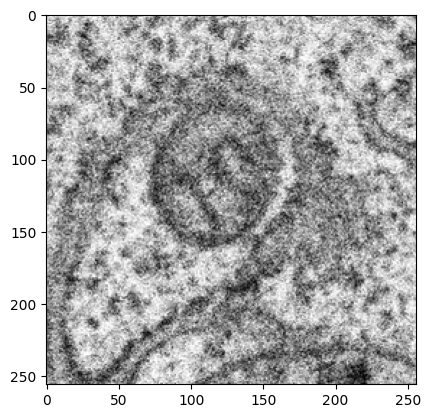

In [14]:
from IPython.display import display, Math
display(Math("\mathtt{Original~slice}:"))
imgplot = plt.imshow(vol[15], cmap="gray")

<IPython.core.display.Math object>

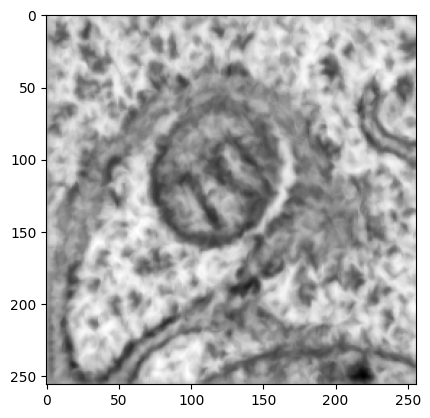

In [15]:
display(Math("\mathtt{Denoised~slice~using~OF~}(\sigma=2):"))
imgplot = plt.imshow(denoised_vol[15], cmap="gray")

<IPython.core.display.Math object>

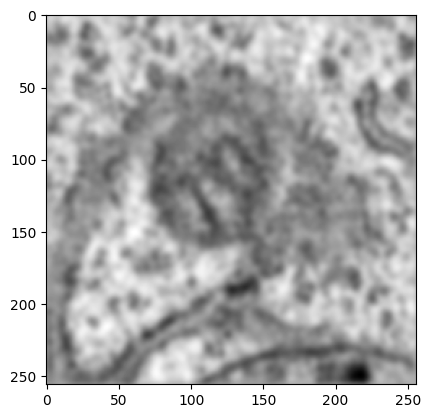

In [16]:
display(Math("\mathtt{Denoised~slice~using~standard~Gaussian~filtering~}(\sigma=2):"))
imgplot = plt.imshow(no_OF_denoised_vol[15], cmap="gray")

## 2. Controlling the length of the filters with the $\sigma$ parameters

### Example for $\sigma_\text{Z}=1.0, \sigma_\text{Y}=2.0~\text{and}~\sigma_\text{X}=0.1$
If $0<\sigma\le 0.1$, then no filtering is performed in the corresponding direction.

In [17]:
%%time
!python ../flowdenoising.py -i small_vol.mrc -o denoised_small_vol.mrc -s 1.0 2.0 0.1 -v 1 2>&1 | grep length

[2023-02-07 20:25:46,358] (INFO) length of each filter (Z, Y, X) = [9, 17, 1]
[2023-02-07 20:25:46,360] (INFO) Filtering along Z with l=3, w=5, and kernel length=9
[2023-02-07 20:25:54,200] (INFO) Filtering along Y with l=3, w=5, and kernel length=17
[2023-02-07 20:26:05,987] (INFO) Filtering along X with l=3, w=5, and kernel length=1
CPU times: user 357 ms, sys: 84.3 ms, total: 441 ms
Wall time: 21.1 s


<IPython.core.display.Math object>

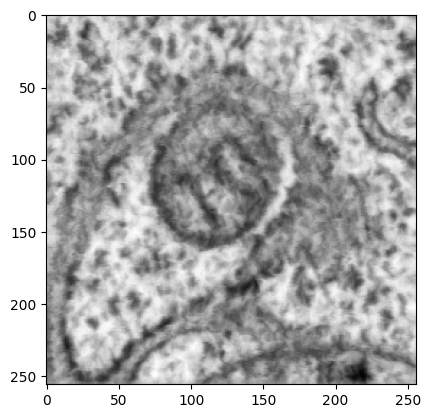

In [18]:
denoised_vol_MRC = mrcfile.open("denoised_small_vol.mrc")
denoised_vol = denoised_vol_MRC.data
display(Math("\mathtt{Denoised~slice~using~OF~}(\sigma_{\mathrm{Z}}=1.0, \sigma_{\mathrm{Y}}=2.0~\mathrm{and}~\sigma_{\mathrm{X}}=0.1):"))
imgplot = plt.imshow(denoised_vol[15], cmap="gray")

## 3. Controlling the search area with the `l` parameter

In [19]:
%%time
!python ../flowdenoising.py -i small_vol.mrc -o denoised_small_vol_l0.mrc -l 0 -v 1 2>&1 | grep "l="

[2023-02-07 20:26:07,924] (INFO) Filtering along Z with l=0, w=5, and kernel length=17
[2023-02-07 20:26:19,278] (INFO) Filtering along Y with l=0, w=5, and kernel length=17
[2023-02-07 20:26:31,047] (INFO) Filtering along X with l=0, w=5, and kernel length=17
CPU times: user 651 ms, sys: 139 ms, total: 790 ms
Wall time: 37 s


In [20]:
%%time
!python ../flowdenoising.py -i small_vol.mrc -o denoised_small_vol_l3.mrc -l 3 -v 1 2>&1 | grep "l="

[2023-02-07 20:26:44,961] (INFO) Filtering along Z with l=3, w=5, and kernel length=17
[2023-02-07 20:27:00,576] (INFO) Filtering along Y with l=3, w=5, and kernel length=17
[2023-02-07 20:27:12,304] (INFO) Filtering along X with l=3, w=5, and kernel length=17
CPU times: user 669 ms, sys: 205 ms, total: 873 ms
Wall time: 41.1 s


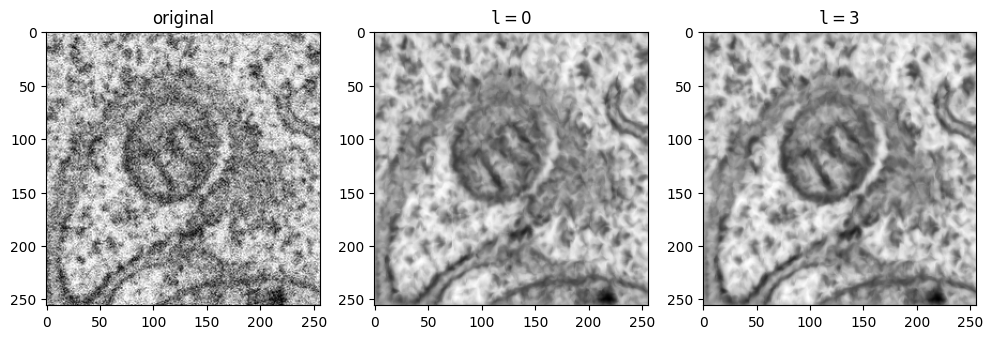

In [21]:
from matplotlib.pyplot import figure
figure(figsize=(12, 12))
denoised_vol_MRC = mrcfile.open("denoised_small_vol_l0.mrc")
denoised_vol_l0 = denoised_vol_MRC.data
plt.subplot(1, 3, 1)
plt.title("original")
imgplot = plt.imshow(vol[15], cmap="gray")
plt.subplot(1, 3, 2)
plt.title(r"$\mathtt{l}=0$")
imgplot = plt.imshow(denoised_vol_l0[15], cmap="gray")
denoised_vol_MRC = mrcfile.open("denoised_small_vol_l3.mrc")
denoised_vol_l3 = denoised_vol_MRC.data
plt.subplot(1, 3, 3)
plt.title(r"$\mathtt{l}=3$")
imgplot = plt.imshow(denoised_vol_l3[15], cmap="gray")

## 4. Controlling the noise sensitivity with the `w` parameter

In [22]:
%%time
!python ../flowdenoising.py -i small_vol.mrc -o denoised_small_vol_w3.mrc -w 3 -v 1 2>&1 | grep "w="

[2023-02-07 20:27:27,451] (INFO) Filtering along Z with l=3, w=3, and kernel length=17
[2023-02-07 20:27:43,126] (INFO) Filtering along Y with l=3, w=3, and kernel length=17
[2023-02-07 20:27:54,909] (INFO) Filtering along X with l=3, w=3, and kernel length=17
CPU times: user 779 ms, sys: 160 ms, total: 939 ms
Wall time: 41.2 s


In [23]:
%%time
!python ../flowdenoising.py -i small_vol.mrc -o denoised_small_vol_w17.mrc -w 17 -v 1 2>&1 | grep "w="

[2023-02-07 20:28:08,758] (INFO) Filtering along Z with l=3, w=17, and kernel length=17
[2023-02-07 20:28:24,294] (INFO) Filtering along Y with l=3, w=17, and kernel length=17
[2023-02-07 20:28:36,045] (INFO) Filtering along X with l=3, w=17, and kernel length=17
CPU times: user 726 ms, sys: 179 ms, total: 906 ms
Wall time: 41 s


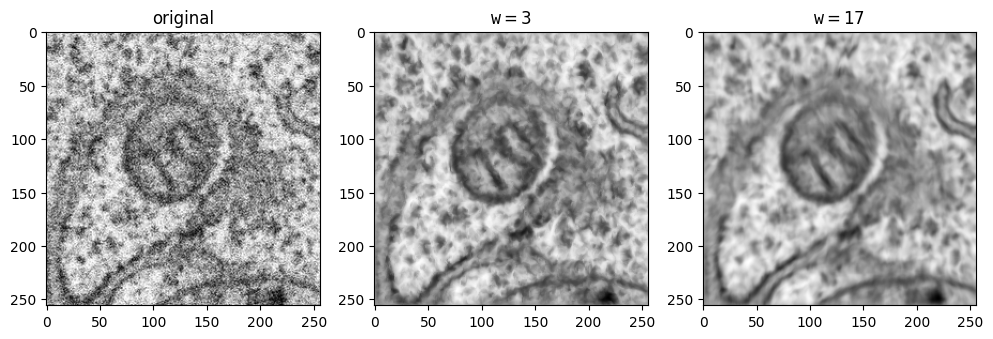

In [24]:
from matplotlib.pyplot import figure
figure(figsize=(12, 12))
denoised_vol_MRC = mrcfile.open("denoised_small_vol_w3.mrc")
denoised_vol_w3 = denoised_vol_MRC.data
plt.subplot(1, 3, 1)
plt.title("original")
imgplot = plt.imshow(vol[15], cmap="gray")
plt.subplot(1, 3, 2)
plt.title(r"$\mathtt{w}=3$")
imgplot = plt.imshow(denoised_vol_w3[15], cmap="gray")
denoised_vol_MRC = mrcfile.open("denoised_small_vol_w17.mrc")
denoised_vol_w17 = denoised_vol_MRC.data
plt.subplot(1, 3, 3)
plt.title(r"$\mathtt{w}=17$")
imgplot = plt.imshow(denoised_vol_w17[15], cmap="gray")

## 4. Using a ("big") volume

In [25]:
%%bash
OUTPUT_FILENAME="big_vol.mrc"
if test ! -f $OUTPUT_FILENAME ; then
    FILEID="1lSFb4VZ5iqR3kLdPv1dDbdOe9dKPZ--_"
    wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id='$FILEID -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id="$FILEID -O $OUTPUT_FILENAME && rm -rf /tmp/cookies.txt
fi

--2023-02-07 20:28:50--  https://docs.google.com/uc?export=download&confirm=t&id=1lSFb4VZ5iqR3kLdPv1dDbdOe9dKPZ--_
Cargado certificado CA '/etc/ssl/certs/ca-certificates.crt'
Resolviendo docs.google.com (docs.google.com)... 2a00:1450:4003:80c::200e, 142.250.184.174
Conectando con docs.google.com (docs.google.com)[2a00:1450:4003:80c::200e]:443... conectado.
Petición HTTP enviada, esperando respuesta... 303 See Other
Localización: https://doc-08-8s-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/v5mblbqag4kjm8q7m8qumlkf7qipps4i/1675798125000/01084993768099894447/*/1lSFb4VZ5iqR3kLdPv1dDbdOe9dKPZ--_?e=download&uuid=55bfcc1a-f362-4179-92ea-96c64d8a1e5d [siguiendo]
Aviso: no se admiten comodines en HTTP.
--2023-02-07 20:28:50--  https://doc-08-8s-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/v5mblbqag4kjm8q7m8qumlkf7qipps4i/1675798125000/01084993768099894447/*/1lSFb4VZ5iqR3kLdPv1dDbdOe9dKPZ--_?e=download&uuid=55bfcc1a-f362-4179-92ea-96c64

  4450K .......... .......... .......... .......... ..........  1% 11,7M 43s
  4500K .......... .......... .......... .......... ..........  1% 11,3M 43s
  4550K .......... .......... .......... .......... ..........  1% 11,2M 43s
  4600K .......... .......... .......... .......... ..........  1% 11,2M 43s
  4650K .......... .......... .......... .......... ..........  1% 11,8M 43s
  4700K .......... .......... .......... .......... ..........  1% 11,0M 43s
  4750K .......... .......... .......... .......... ..........  1% 11,3M 43s
  4800K .......... .......... .......... .......... ..........  1% 8,80M 43s
  4850K .......... .......... .......... .......... ..........  1% 11,1M 43s
  4900K .......... .......... .......... .......... ..........  1% 1,99M 44s
  4950K .......... .......... .......... .......... ..........  1% 14,3M 44s
  5000K .......... .......... .......... .......... ..........  1% 55,2M 44s
  5050K .......... .......... .......... .......... ..........  1% 62,7M 43s

  9800K .......... .......... .......... .......... ..........  2% 52,8M 40s
  9850K .......... .......... .......... .......... ..........  2% 84,9M 40s
  9900K .......... .......... .......... .......... ..........  2% 77,3M 39s
  9950K .......... .......... .......... .......... ..........  2% 18,8M 39s
 10000K .......... .......... .......... .......... ..........  2% 7,12M 39s
 10050K .......... .......... .......... .......... ..........  2% 9,67M 39s
 10100K .......... .......... .......... .......... ..........  2% 13,4M 39s
 10150K .......... .......... .......... .......... ..........  2% 11,5M 39s
 10200K .......... .......... .......... .......... ..........  2% 10,6M 39s
 10250K .......... .......... .......... .......... ..........  2% 11,7M 39s
 10300K .......... .......... .......... .......... ..........  2% 11,8M 39s
 10350K .......... .......... .......... .......... ..........  2% 10,9M 39s
 10400K .......... .......... .......... .......... ..........  2% 8,79M 39s

 15150K .......... .......... .......... .......... ..........  3% 10,8M 38s
 15200K .......... .......... .......... .......... ..........  3% 8,89M 38s
 15250K .......... .......... .......... .......... ..........  3% 11,6M 38s
 15300K .......... .......... .......... .......... ..........  3% 11,6M 38s
 15350K .......... .......... .......... .......... ..........  3% 11,0M 38s
 15400K .......... .......... .......... .......... ..........  3% 11,2M 38s
 15450K .......... .......... .......... .......... ..........  3% 11,0M 38s
 15500K .......... .......... .......... .......... ..........  3% 11,8M 38s
 15550K .......... .......... .......... .......... ..........  3% 11,2M 38s
 15600K .......... .......... .......... .......... ..........  3% 8,84M 38s
 15650K .......... .......... .......... .......... ..........  3% 1,97M 38s
 15700K .......... .......... .......... .......... ..........  3% 15,5M 38s
 15750K .......... .......... .......... .......... ..........  3% 76,0M 38s

 20500K .......... .......... .......... .......... ..........  5% 8,58M 37s
 20550K .......... .......... .......... .......... ..........  5% 11,0M 37s
 20600K .......... .......... .......... .......... ..........  5% 11,0M 37s
 20650K .......... .......... .......... .......... ..........  5% 11,9M 37s
 20700K .......... .......... .......... .......... ..........  5% 10,8M 37s
 20750K .......... .......... .......... .......... ..........  5% 10,5M 37s
 20800K .......... .......... .......... .......... ..........  5% 9,74M 37s
 20850K .......... .......... .......... .......... ..........  5% 11,0M 37s
 20900K .......... .......... .......... .......... ..........  5% 11,6M 37s
 20950K .......... .......... .......... .......... ..........  5% 11,6M 37s
 21000K .......... .......... .......... .......... ..........  5% 10,7M 37s
 21050K .......... .......... .......... .......... ..........  5% 11,5M 37s
 21100K .......... .......... .......... .......... ..........  5% 11,0M 37s

 25850K .......... .......... .......... .......... ..........  6% 11,4M 36s
 25900K .......... .......... .......... .......... ..........  6% 11,0M 36s
 25950K .......... .......... .......... .......... ..........  6% 11,7M 36s
 26000K .......... .......... .......... .......... ..........  6% 8,89M 36s
 26050K .......... .......... .......... .......... ..........  6% 2,01M 37s
 26100K .......... .......... .......... .......... ..........  6% 11,7M 37s
 26150K .......... .......... .......... .......... ..........  6% 46,2M 37s
 26200K .......... .......... .......... .......... ..........  6% 58,0M 37s
 26250K .......... .......... .......... .......... ..........  6% 39,1M 36s
 26300K .......... .......... .......... .......... ..........  6% 74,6M 36s
 26350K .......... .......... .......... .......... ..........  6% 46,5M 36s
 26400K .......... .......... .......... .......... ..........  6% 6,15M 36s
 26450K .......... .......... .......... .......... ..........  6% 11,5M 36s

 31200K .......... .......... .......... .......... ..........  7% 43,3M 36s
 31250K .......... .......... .......... .......... ..........  7% 29,5M 36s
 31300K .......... .......... .......... .......... ..........  7% 45,7M 36s
 31350K .......... .......... .......... .......... ..........  7% 16,4M 36s
 31400K .......... .......... .......... .......... ..........  7% 11,0M 36s
 31450K .......... .......... .......... .......... ..........  7% 1,03M 37s
 31500K .......... .......... .......... .......... ..........  7% 4,36M 37s
 31550K .......... .......... .......... .......... ..........  7% 14,9M 37s
 31600K .......... .......... .......... .......... ..........  7% 50,2M 37s
 31650K .......... .......... .......... .......... ..........  7% 52,9M 37s
 31700K .......... .......... .......... .......... ..........  7% 61,0M 37s
 31750K .......... .......... .......... .......... ..........  7% 47,2M 37s
 31800K .......... .......... .......... .......... ..........  7% 6,00M 37s

 36550K .......... .......... .......... .......... ..........  8% 11,7M 37s
 36600K .......... .......... .......... .......... ..........  8% 10,6M 37s
 36650K .......... .......... .......... .......... ..........  8% 11,5M 37s
 36700K .......... .......... .......... .......... ..........  8% 11,6M 37s
 36750K .......... .......... .......... .......... ..........  8% 11,2M 37s
 36800K .......... .......... .......... .......... ..........  8% 8,77M 37s
 36850K .......... .......... .......... .......... ..........  9% 11,6M 37s
 36900K .......... .......... .......... .......... ..........  9% 10,8M 37s
 36950K .......... .......... .......... .......... ..........  9% 11,8M 37s
 37000K .......... .......... .......... .......... ..........  9% 11,3M 37s
 37050K .......... .......... .......... .......... ..........  9% 9,02M 37s
 37100K .......... .......... .......... .......... ..........  9% 13,6M 37s
 37150K .......... .......... .......... .......... ..........  9% 11,7M 37s

 41900K .......... .......... .......... .......... .......... 10% 86,8M 36s
 41950K .......... .......... .......... .......... .......... 10% 68,9M 36s
 42000K .......... .......... .......... .......... .......... 10% 44,9M 36s
 42050K .......... .......... .......... .......... .......... 10% 8,50M 36s
 42100K .......... .......... .......... .......... .......... 10% 9,18M 36s
 42150K .......... .......... .......... .......... .......... 10% 11,7M 36s
 42200K .......... .......... .......... .......... .......... 10% 11,4M 36s
 42250K .......... .......... .......... .......... .......... 10% 9,04M 36s
 42300K .......... .......... .......... .......... .......... 10% 15,0M 36s
 42350K .......... .......... .......... .......... .......... 10% 11,5M 36s
 42400K .......... .......... .......... .......... .......... 10% 8,47M 36s
 42450K .......... .......... .......... .......... .......... 10% 11,5M 36s
 42500K .......... .......... .......... .......... .......... 10% 11,6M 36s

 47250K .......... .......... .......... .......... .......... 11% 11,0M 36s
 47300K .......... .......... .......... .......... .......... 11% 11,4M 36s
 47350K .......... .......... .......... .......... .......... 11% 11,7M 36s
 47400K .......... .......... .......... .......... .......... 11% 10,9M 36s
 47450K .......... .......... .......... .......... .......... 11% 11,6M 36s
 47500K .......... .......... .......... .......... .......... 11% 11,0M 36s
 47550K .......... .......... .......... .......... .......... 11% 11,4M 36s
 47600K .......... .......... .......... .......... .......... 11% 8,65M 36s
 47650K .......... .......... .......... .......... .......... 11% 11,7M 36s
 47700K .......... .......... .......... .......... .......... 11% 1,92M 36s
 47750K .......... .......... .......... .......... .......... 11% 13,7M 36s
 47800K .......... .......... .......... .......... .......... 11% 98,1M 36s
 47850K .......... .......... .......... .......... .......... 11%  106M 36s

 52600K .......... .......... .......... .......... .......... 12% 11,2M 35s
 52650K .......... .......... .......... .......... .......... 12% 10,9M 35s
 52700K .......... .......... .......... .......... .......... 12% 11,5M 35s
 52750K .......... .......... .......... .......... .......... 12% 11,6M 35s
 52800K .......... .......... .......... .......... .......... 12% 8,83M 35s
 52850K .......... .......... .......... .......... .......... 12% 10,9M 35s
 52900K .......... .......... .......... .......... .......... 12% 11,7M 35s
 52950K .......... .......... .......... .......... .......... 12% 11,1M 35s
 53000K .......... .......... .......... .......... .......... 12% 11,4M 35s
 53050K .......... .......... .......... .......... .......... 12% 11,2M 35s
 53100K .......... .......... .......... .......... .......... 12% 11,3M 35s
 53150K .......... .......... .......... .......... .......... 12% 11,6M 35s
 53200K .......... .......... .......... .......... .......... 13% 8,65M 35s

 57950K .......... .......... .......... .......... .......... 14% 11,0M 34s
 58000K .......... .......... .......... .......... .......... 14% 8,88M 34s
 58050K .......... .......... .......... .......... .......... 14% 11,5M 34s
 58100K .......... .......... .......... .......... .......... 14% 1,94M 34s
 58150K .......... .......... .......... .......... .......... 14% 23,6M 34s
 58200K .......... .......... .......... .......... .......... 14% 58,4M 34s
 58250K .......... .......... .......... .......... .......... 14% 48,8M 34s
 58300K .......... .......... .......... .......... .......... 14% 55,9M 34s
 58350K .......... .......... .......... .......... .......... 14% 47,9M 34s
 58400K .......... .......... .......... .......... .......... 14% 11,7M 34s
 58450K .......... .......... .......... .......... .......... 14% 9,58M 34s
 58500K .......... .......... .......... .......... .......... 14% 11,5M 34s
 58550K .......... .......... .......... .......... .......... 14% 11,1M 34s

 63300K .......... .......... .......... .......... .......... 15% 11,5M 34s
 63350K .......... .......... .......... .......... .......... 15% 11,6M 34s
 63400K .......... .......... .......... .......... .......... 15% 10,9M 34s
 63450K .......... .......... .......... .......... .......... 15% 11,2M 34s
 63500K .......... .......... .......... .......... .......... 15% 10,9M 34s
 63550K .......... .......... .......... .......... .......... 15% 11,8M 34s
 63600K .......... .......... .......... .......... .......... 15% 8,83M 34s
 63650K .......... .......... .......... .......... .......... 15% 11,5M 34s
 63700K .......... .......... .......... .......... .......... 15% 11,0M 34s
 63750K .......... .......... .......... .......... .......... 15% 11,6M 34s
 63800K .......... .......... .......... .......... .......... 15% 2,02M 34s
 63850K .......... .......... .......... .......... .......... 15% 11,8M 34s
 63900K .......... .......... .......... .......... .......... 15% 40,0M 34s

 68650K .......... .......... .......... .......... .......... 16% 11,2M 34s
 68700K .......... .......... .......... .......... .......... 16% 11,6M 34s
 68750K .......... .......... .......... .......... .......... 16% 11,6M 34s
 68800K .......... .......... .......... .......... .......... 16% 8,47M 34s
 68850K .......... .......... .......... .......... .......... 16% 11,4M 34s
 68900K .......... .......... .......... .......... .......... 16% 11,6M 34s
 68950K .......... .......... .......... .......... .......... 16% 10,3M 33s
 69000K .......... .......... .......... .......... .......... 16% 12,1M 33s
 69050K .......... .......... .......... .......... .......... 16% 11,6M 33s
 69100K .......... .......... .......... .......... .......... 16% 11,1M 33s
 69150K .......... .......... .......... .......... .......... 16% 11,6M 33s
 69200K .......... .......... .......... .......... .......... 16% 8,76M 33s
 69250K .......... .......... .......... .......... .......... 16% 11,0M 33s

 74000K .......... .......... .......... .......... .......... 18% 59,5M 33s
 74050K .......... .......... .......... .......... .......... 18% 94,6M 33s
 74100K .......... .......... .......... .......... .......... 18%  106M 33s
 74150K .......... .......... .......... .......... .......... 18% 93,3M 33s
 74200K .......... .......... .......... .......... .......... 18% 7,63M 33s
 74250K .......... .......... .......... .......... .......... 18% 6,51M 33s
 74300K .......... .......... .......... .......... .......... 18% 6,67M 33s
 74350K .......... .......... .......... .......... .......... 18% 6,01M 33s
 74400K .......... .......... .......... .......... .......... 18%  974K 34s
 74450K .......... .......... .......... .......... .......... 18% 98,8M 33s
 74500K .......... .......... .......... .......... .......... 18% 78,4M 33s
 74550K .......... .......... .......... .......... .......... 18% 82,0M 33s
 74600K .......... .......... .......... .......... .......... 18% 81,3M 33s

 79350K .......... .......... .......... .......... .......... 19% 5,86M 35s
 79400K .......... .......... .......... .......... .......... 19% 5,37M 35s
 79450K .......... .......... .......... .......... .......... 19% 5,59M 35s
 79500K .......... .......... .......... .......... .......... 19% 6,11M 35s
 79550K .......... .......... .......... .......... .......... 19% 5,29M 35s
 79600K .......... .......... .......... .......... .......... 19% 4,39M 35s
 79650K .......... .......... .......... .......... .......... 19% 5,91M 35s
 79700K .......... .......... .......... .......... .......... 19% 5,59M 35s
 79750K .......... .......... .......... .......... .......... 19% 5,61M 35s
 79800K .......... .......... .......... .......... .......... 19% 5,68M 35s
 79850K .......... .......... .......... .......... .......... 19% 5,49M 35s
 79900K .......... .......... .......... .......... .......... 19% 5,96M 35s
 79950K .......... .......... .......... .......... .......... 19% 5,69M 35s

 84700K .......... .......... .......... .......... .......... 20% 11,5M 34s
 84750K .......... .......... .......... .......... .......... 20% 11,5M 34s
 84800K .......... .......... .......... .......... .......... 20% 8,41M 34s
 84850K .......... .......... .......... .......... .......... 20% 11,6M 34s
 84900K .......... .......... .......... .......... .......... 20% 11,6M 34s
 84950K .......... .......... .......... .......... .......... 20% 11,1M 34s
 85000K .......... .......... .......... .......... .......... 20% 11,4M 34s
 85050K .......... .......... .......... .......... .......... 20% 1,98M 34s
 85100K .......... .......... .......... .......... .......... 20% 38,1M 34s
 85150K .......... .......... .......... .......... .......... 20%  104M 34s
 85200K .......... .......... .......... .......... .......... 20% 85,9M 34s
 85250K .......... .......... .......... .......... .......... 20%  139M 34s
 85300K .......... .......... .......... .......... .......... 20% 12,0M 34s

 90050K .......... .......... .......... .......... .......... 21% 11,7M 34s
 90100K .......... .......... .......... .......... .......... 22% 11,4M 34s
 90150K .......... .......... .......... .......... .......... 22% 11,0M 34s
 90200K .......... .......... .......... .......... .......... 22% 11,3M 34s
 90250K .......... .......... .......... .......... .......... 22% 11,6M 34s
 90300K .......... .......... .......... .......... .......... 22% 11,1M 34s
 90350K .......... .......... .......... .......... .......... 22% 11,4M 34s
 90400K .......... .......... .......... .......... .......... 22% 8,72M 33s
 90450K .......... .......... .......... .......... .......... 22% 10,8M 33s
 90500K .......... .......... .......... .......... .......... 22% 11,8M 33s
 90550K .......... .......... .......... .......... .......... 22% 11,4M 33s
 90600K .......... .......... .......... .......... .......... 22% 10,9M 33s
 90650K .......... .......... .......... .......... .......... 22% 11,7M 33s

 95400K .......... .......... .......... .......... .......... 23% 1,93M 33s
 95450K .......... .......... .......... .......... .......... 23% 19,1M 33s
 95500K .......... .......... .......... .......... .......... 23% 68,8M 33s
 95550K .......... .......... .......... .......... .......... 23% 77,4M 33s
 95600K .......... .......... .......... .......... .......... 23% 80,6M 33s
 95650K .......... .......... .......... .......... .......... 23% 54,1M 33s
 95700K .......... .......... .......... .......... .......... 23% 9,03M 33s
 95750K .......... .......... .......... .......... .......... 23% 9,41M 33s
 95800K .......... .......... .......... .......... .......... 23% 11,2M 33s
 95850K .......... .......... .......... .......... .......... 23% 11,0M 33s
 95900K .......... .......... .......... .......... .......... 23% 11,6M 33s
 95950K .......... .......... .......... .......... .......... 23% 11,6M 33s
 96000K .......... .......... .......... .......... .......... 23% 8,38M 33s

100750K .......... .......... .......... .......... .......... 24% 10,8M 32s
100800K .......... .......... .......... .......... .......... 24% 8,81M 32s
100850K .......... .......... .......... .......... .......... 24% 11,7M 32s
100900K .......... .......... .......... .......... .......... 24% 11,6M 32s
100950K .......... .......... .......... .......... .......... 24% 11,1M 32s
101000K .......... .......... .......... .......... .......... 24% 11,3M 32s
101050K .......... .......... .......... .......... .......... 24% 11,0M 32s
101100K .......... .......... .......... .......... .......... 24% 11,4M 32s
101150K .......... .......... .......... .......... .......... 24% 11,6M 32s
101200K .......... .......... .......... .......... .......... 24% 8,82M 32s
101250K .......... .......... .......... .......... .......... 24% 11,0M 32s
101300K .......... .......... .......... .......... .......... 24% 2,01M 32s
101350K .......... .......... .......... .......... .......... 24% 14,3M 32s

106100K .......... .......... .......... .......... .......... 25% 9,84M 31s
106150K .......... .......... .......... .......... .......... 25% 11,0M 31s
106200K .......... .......... .......... .......... .......... 25% 11,3M 31s
106250K .......... .......... .......... .......... .......... 25% 11,8M 31s
106300K .......... .......... .......... .......... .......... 25% 11,0M 31s
106350K .......... .......... .......... .......... .......... 25% 11,5M 31s
106400K .......... .......... .......... .......... .......... 25% 8,70M 31s
106450K .......... .......... .......... .......... .......... 26% 11,0M 31s
106500K .......... .......... .......... .......... .......... 26% 11,5M 31s
106550K .......... .......... .......... .......... .......... 26% 11,5M 31s
106600K .......... .......... .......... .......... .......... 26% 10,8M 31s
106650K .......... .......... .......... .......... .......... 26% 11,8M 31s
106700K .......... .......... .......... .......... .......... 26% 10,9M 31s

111450K .......... .......... .......... .......... .......... 27% 7,38M 31s
111500K .......... .......... .......... .......... .......... 27% 12,3M 31s
111550K .......... .......... .......... .......... .......... 27% 10,7M 31s
111600K .......... .......... .......... .......... .......... 27%  938K 31s
111650K .......... .......... .......... .......... .......... 27% 23,8M 31s
111700K .......... .......... .......... .......... .......... 27% 56,8M 31s
111750K .......... .......... .......... .......... .......... 27% 60,2M 31s
111800K .......... .......... .......... .......... .......... 27% 52,0M 31s
111850K .......... .......... .......... .......... .......... 27% 59,4M 31s
111900K .......... .......... .......... .......... .......... 27% 18,3M 31s
111950K .......... .......... .......... .......... .......... 27% 6,47M 31s
112000K .......... .......... .......... .......... .......... 27% 4,12M 31s
112050K .......... .......... .......... .......... .......... 27%  915K 31s

116800K .......... .......... .......... .......... .......... 28% 8,65M 31s
116850K .......... .......... .......... .......... .......... 28% 11,7M 31s
116900K .......... .......... .......... .......... .......... 28% 11,6M 31s
116950K .......... .......... .......... .......... .......... 28% 10,9M 31s
117000K .......... .......... .......... .......... .......... 28% 11,5M 31s
117050K .......... .......... .......... .......... .......... 28% 10,9M 31s
117100K .......... .......... .......... .......... .......... 28% 1,95M 31s
117150K .......... .......... .......... .......... .......... 28% 61,2M 31s
117200K .......... .......... .......... .......... .......... 28%  105M 31s
117250K .......... .......... .......... .......... .......... 28%  104M 31s
117300K .......... .......... .......... .......... .......... 28%  152M 31s
117350K .......... .......... .......... .......... .......... 28% 16,5M 31s
117400K .......... .......... .......... .......... .......... 28% 8,52M 31s

122150K .......... .......... .......... .......... .......... 29% 11,0M 30s
122200K .......... .......... .......... .......... .......... 29% 11,3M 30s
122250K .......... .......... .......... .......... .......... 29% 11,0M 30s
122300K .......... .......... .......... .......... .......... 29% 11,5M 30s
122350K .......... .......... .......... .......... .......... 29% 11,6M 30s
122400K .......... .......... .......... .......... .......... 29% 8,63M 30s
122450K .......... .......... .......... .......... .......... 29% 11,4M 30s
122500K .......... .......... .......... .......... .......... 29% 10,4M 30s
122550K .......... .......... .......... .......... .......... 29% 12,3M 30s
122600K .......... .......... .......... .......... .......... 29% 11,2M 30s
122650K .......... .......... .......... .......... .......... 29% 11,5M 30s
122700K .......... .......... .......... .......... .......... 29% 11,3M 30s
122750K .......... .......... .......... .......... .......... 29% 11,3M 30s

127500K .......... .......... .......... .......... .......... 31% 16,0M 29s
127550K .......... .......... .......... .......... .......... 31% 81,0M 29s
127600K .......... .......... .......... .......... .......... 31% 66,2M 29s
127650K .......... .......... .......... .......... .......... 31% 80,4M 29s
127700K .......... .......... .......... .......... .......... 31% 22,2M 29s
127750K .......... .......... .......... .......... .......... 31% 8,26M 29s
127800K .......... .......... .......... .......... .......... 31% 10,8M 29s
127850K .......... .......... .......... .......... .......... 31% 11,8M 29s
127900K .......... .......... .......... .......... .......... 31% 11,1M 29s
127950K .......... .......... .......... .......... .......... 31% 11,7M 29s
128000K .......... .......... .......... .......... .......... 31% 8,46M 29s
128050K .......... .......... .......... .......... .......... 31% 11,7M 29s
128100K .......... .......... .......... .......... .......... 31% 11,5M 29s

132850K .......... .......... .......... .......... .......... 32% 11,1M 29s
132900K .......... .......... .......... .......... .......... 32% 11,6M 29s
132950K .......... .......... .......... .......... .......... 32% 11,4M 29s
133000K .......... .......... .......... .......... .......... 32% 10,8M 29s
133050K .......... .......... .......... .......... .......... 32% 11,6M 29s
133100K .......... .......... .......... .......... .......... 32% 11,0M 29s
133150K .......... .......... .......... .......... .......... 32% 11,6M 29s
133200K .......... .......... .......... .......... .......... 32% 8,70M 29s
133250K .......... .......... .......... .......... .......... 32% 11,5M 29s
133300K .......... .......... .......... .......... .......... 32% 11,1M 29s
133350K .......... .......... .......... .......... .......... 32% 1,94M 29s
133400K .......... .......... .......... .......... .......... 32% 17,7M 29s
133450K .......... .......... .......... .......... .......... 32%  120M 29s

138200K .......... .......... .......... .......... .......... 33% 10,7M 28s
138250K .......... .......... .......... .......... .......... 33% 11,9M 28s
138300K .......... .......... .......... .......... .......... 33% 11,6M 28s
138350K .......... .......... .......... .......... .......... 33% 10,7M 28s
138400K .......... .......... .......... .......... .......... 33% 8,79M 28s
138450K .......... .......... .......... .......... .......... 33% 11,7M 28s
138500K .......... .......... .......... .......... .......... 33% 10,8M 28s
138550K .......... .......... .......... .......... .......... 33% 11,7M 28s
138600K .......... .......... .......... .......... .......... 33% 11,1M 28s
138650K .......... .......... .......... .......... .......... 33% 11,1M 28s
138700K .......... .......... .......... .......... .......... 33% 11,9M 28s
138750K .......... .......... .......... .......... .......... 33% 11,0M 28s
138800K .......... .......... .......... .......... .......... 33% 8,80M 28s

143550K .......... .......... .......... .......... .......... 35% 11,6M 27s
143600K .......... .......... .......... .......... .......... 35% 8,64M 27s
143650K .......... .......... .......... .......... .......... 35% 11,1M 27s
143700K .......... .......... .......... .......... .......... 35% 11,7M 27s
143750K .......... .......... .......... .......... .......... 35% 1,92M 27s
143800K .......... .......... .......... .......... .......... 35% 25,1M 27s
143850K .......... .......... .......... .......... .......... 35% 56,8M 27s
143900K .......... .......... .......... .......... .......... 35% 54,9M 27s
143950K .......... .......... .......... .......... .......... 35% 52,7M 27s
144000K .......... .......... .......... .......... .......... 35% 46,6M 27s
144050K .......... .......... .......... .......... .......... 35% 14,1M 27s
144100K .......... .......... .......... .......... .......... 35% 8,32M 27s
144150K .......... .......... .......... .......... .......... 35% 11,1M 27s

148900K .......... .......... .......... .......... .......... 36% 11,4M 27s
148950K .......... .......... .......... .......... .......... 36% 11,9M 27s
149000K .......... .......... .......... .......... .......... 36% 10,6M 27s
149050K .......... .......... .......... .......... .......... 36% 11,1M 27s
149100K .......... .......... .......... .......... .......... 36% 11,4M 27s
149150K .......... .......... .......... .......... .......... 36% 11,7M 27s
149200K .......... .......... .......... .......... .......... 36% 8,78M 27s
149250K .......... .......... .......... .......... .......... 36% 11,0M 27s
149300K .......... .......... .......... .......... .......... 36% 11,6M 27s
149350K .......... .......... .......... .......... .......... 36% 11,6M 27s
149400K .......... .......... .......... .......... .......... 36% 10,7M 27s
149450K .......... .......... .......... .......... .......... 36% 11,6M 27s
149500K .......... .......... .......... .......... .......... 36% 11,4M 27s

154250K .......... .......... .......... .......... .......... 37% 16,0M 26s
154300K .......... .......... .......... .......... .......... 37% 72,4M 26s
154350K .......... .......... .......... .......... .......... 37% 80,6M 26s
154400K .......... .......... .......... .......... .......... 37% 68,2M 26s
154450K .......... .......... .......... .......... .......... 37% 92,9M 26s
154500K .......... .......... .......... .......... .......... 37% 13,9M 26s
154550K .......... .......... .......... .......... .......... 37% 8,86M 26s
154600K .......... .......... .......... .......... .......... 37% 10,8M 26s
154650K .......... .......... .......... .......... .......... 37% 11,6M 26s
154700K .......... .......... .......... .......... .......... 37% 11,4M 26s
154750K .......... .......... .......... .......... .......... 37% 11,3M 26s
154800K .......... .......... .......... .......... .......... 37% 8,59M 26s
154850K .......... .......... .......... .......... .......... 37% 11,8M 26s

159600K .......... .......... .......... .......... .......... 38% 8,46M 25s
159650K .......... .......... .......... .......... .......... 38% 11,6M 25s
159700K .......... .......... .......... .......... .......... 39% 11,6M 25s
159750K .......... .......... .......... .......... .......... 39% 11,0M 25s
159800K .......... .......... .......... .......... .......... 39% 11,1M 25s
159850K .......... .......... .......... .......... .......... 39% 11,5M 25s
159900K .......... .......... .......... .......... .......... 39% 11,4M 25s
159950K .......... .......... .......... .......... .......... 39% 11,6M 25s
160000K .......... .......... .......... .......... .......... 39% 8,66M 25s
160050K .......... .......... .......... .......... .......... 39% 10,9M 25s
160100K .......... .......... .......... .......... .......... 39% 11,8M 25s
160150K .......... .......... .......... .......... .......... 39% 1,91M 25s
160200K .......... .......... .......... .......... .......... 39% 14,1M 25s

164950K .......... .......... .......... .......... .......... 40% 67,2M 25s
165000K .......... .......... .......... .......... .......... 40% 77,2M 25s
165050K .......... .......... .......... .......... .......... 40% 96,0M 25s
165100K .......... .......... .......... .......... .......... 40% 77,1M 25s
165150K .......... .......... .......... .......... .......... 40% 77,4M 25s
165200K .......... .......... .......... .......... .......... 40% 14,2M 25s
165250K .......... .......... .......... .......... .......... 40% 7,67M 25s
165300K .......... .......... .......... .......... .......... 40% 7,25M 25s
165350K .......... .......... .......... .......... .......... 40% 1,61M 25s
165400K .......... .......... .......... .......... .......... 40% 9,65M 25s
165450K .......... .......... .......... .......... .......... 40% 63,6M 25s
165500K .......... .......... .......... .......... .......... 40% 9,39M 25s
165550K .......... .......... .......... .......... .......... 40% 19,9M 25s

170300K .......... .......... .......... .......... .......... 41% 11,5M 25s
170350K .......... .......... .......... .......... .......... 41% 11,7M 24s
170400K .......... .......... .......... .......... .......... 41% 8,29M 24s
170450K .......... .......... .......... .......... .......... 41% 11,5M 24s
170500K .......... .......... .......... .......... .......... 41% 11,6M 24s
170550K .......... .......... .......... .......... .......... 41% 11,1M 24s
170600K .......... .......... .......... .......... .......... 41% 11,2M 24s
170650K .......... .......... .......... .......... .......... 41% 11,8M 24s
170700K .......... .......... .......... .......... .......... 41% 11,1M 24s
170750K .......... .......... .......... .......... .......... 41% 11,2M 24s
170800K .......... .......... .......... .......... .......... 41% 8,82M 24s
170850K .......... .......... .......... .......... .......... 41% 11,1M 24s
170900K .......... .......... .......... .......... .......... 41% 11,6M 24s

175650K .......... .......... .......... .......... .......... 42% 10,9M 24s
175700K .......... .......... .......... .......... .......... 42% 12,4M 24s
175750K .......... .......... .......... .......... .......... 42% 11,0M 24s
175800K .......... .......... .......... .......... .......... 42% 1,94M 24s
175850K .......... .......... .......... .......... .......... 42% 30,3M 24s
175900K .......... .......... .......... .......... .......... 42%  138M 24s
175950K .......... .......... .......... .......... .......... 42%  106M 24s
176000K .......... .......... .......... .......... .......... 42% 87,2M 24s
176050K .......... .......... .......... .......... .......... 42% 18,7M 24s
176100K .......... .......... .......... .......... .......... 43% 8,31M 24s
176150K .......... .......... .......... .......... .......... 43% 10,0M 24s
176200K .......... .......... .......... .......... .......... 43% 11,2M 24s
176250K .......... .......... .......... .......... .......... 43% 11,4M 24s

181000K .......... .......... .......... .......... .......... 44% 11,0M 23s
181050K .......... .......... .......... .......... .......... 44% 11,7M 23s
181100K .......... .......... .......... .......... .......... 44% 11,2M 23s
181150K .......... .......... .......... .......... .......... 44% 11,6M 23s
181200K .......... .......... .......... .......... .......... 44% 8,67M 23s
181250K .......... .......... .......... .......... .......... 44% 11,2M 23s
181300K .......... .......... .......... .......... .......... 44% 11,4M 23s
181350K .......... .......... .......... .......... .......... 44% 11,7M 23s
181400K .......... .......... .......... .......... .......... 44% 10,8M 23s
181450K .......... .......... .......... .......... .......... 44% 11,2M 23s
181500K .......... .......... .......... .......... .......... 44% 11,6M 23s
181550K .......... .......... .......... .......... .......... 44% 10,9M 23s
181600K .......... .......... .......... .......... .......... 44% 8,95M 23s

186350K .......... .......... .......... .......... .......... 45% 47,5M 23s
186400K .......... .......... .......... .......... .......... 45% 59,6M 23s
186450K .......... .......... .......... .......... .......... 45% 72,0M 23s
186500K .......... .......... .......... .......... .......... 45% 84,3M 23s
186550K .......... .......... .......... .......... .......... 45% 15,8M 23s
186600K .......... .......... .......... .......... .......... 45% 8,79M 23s
186650K .......... .......... .......... .......... .......... 45% 11,5M 23s
186700K .......... .......... .......... .......... .......... 45% 11,3M 23s
186750K .......... .......... .......... .......... .......... 45% 11,4M 23s
186800K .......... .......... .......... .......... .......... 45% 8,66M 23s
186850K .......... .......... .......... .......... .......... 45% 11,4M 23s
186900K .......... .......... .......... .......... .......... 45% 11,2M 23s
186950K .......... .......... .......... .......... .......... 45% 11,6M 23s

191700K .......... .......... .......... .......... .......... 46% 11,5M 22s
191750K .......... .......... .......... .......... .......... 46% 10,9M 22s
191800K .......... .......... .......... .......... .......... 46% 11,6M 22s
191850K .......... .......... .......... .......... .......... 46% 11,5M 22s
191900K .......... .......... .......... .......... .......... 46% 10,8M 22s
191950K .......... .......... .......... .......... .......... 46% 11,9M 22s
192000K .......... .......... .......... .......... .......... 46% 8,69M 22s
192050K .......... .......... .......... .......... .......... 46% 11,0M 22s
192100K .......... .......... .......... .......... .......... 46% 11,5M 22s
192150K .......... .......... .......... .......... .......... 46% 11,0M 22s
192200K .......... .......... .......... .......... .......... 46% 2,07M 22s
192250K .......... .......... .......... .......... .......... 46% 15,3M 22s
192300K .......... .......... .......... .......... .......... 46% 49,3M 22s

197050K .......... .......... .......... .......... .......... 48% 11,5M 22s
197100K .......... .......... .......... .......... .......... 48% 11,0M 21s
197150K .......... .......... .......... .......... .......... 48% 11,2M 21s
197200K .......... .......... .......... .......... .......... 48% 8,93M 21s
197250K .......... .......... .......... .......... .......... 48% 11,1M 21s
197300K .......... .......... .......... .......... .......... 48% 11,8M 21s
197350K .......... .......... .......... .......... .......... 48% 11,5M 21s
197400K .......... .......... .......... .......... .......... 48% 10,6M 21s
197450K .......... .......... .......... .......... .......... 48% 11,8M 21s
197500K .......... .......... .......... .......... .......... 48% 11,0M 21s
197550K .......... .......... .......... .......... .......... 48% 11,5M 21s
197600K .......... .......... .......... .......... .......... 48% 8,71M 21s
197650K .......... .......... .......... .......... .......... 48% 11,5M 21s

202400K .......... .......... .......... .......... .......... 49% 8,60M 21s
202450K .......... .......... .......... .......... .......... 49% 11,8M 21s
202500K .......... .......... .......... .......... .......... 49% 11,0M 21s
202550K .......... .......... .......... .......... .......... 49% 2,09M 21s
202600K .......... .......... .......... .......... .......... 49% 11,5M 21s
202650K .......... .......... .......... .......... .......... 49% 70,7M 21s
202700K .......... .......... .......... .......... .......... 49% 78,4M 21s
202750K .......... .......... .......... .......... .......... 49% 65,6M 21s
202800K .......... .......... .......... .......... .......... 49% 20,2M 21s
202850K .......... .......... .......... .......... .......... 49% 8,86M 21s
202900K .......... .......... .......... .......... .......... 49% 9,73M 21s
202950K .......... .......... .......... .......... .......... 49% 11,5M 21s
203000K .......... .......... .......... .......... .......... 49% 10,6M 21s

207750K .......... .......... .......... .......... .......... 50% 11,1M 20s
207800K .......... .......... .......... .......... .......... 50% 11,5M 20s
207850K .......... .......... .......... .......... .......... 50% 11,0M 20s
207900K .......... .......... .......... .......... .......... 50% 11,2M 20s
207950K .......... .......... .......... .......... .......... 50% 11,6M 20s
208000K .......... .......... .......... .......... .......... 50% 8,66M 20s
208050K .......... .......... .......... .......... .......... 50% 11,1M 20s
208100K .......... .......... .......... .......... .......... 50% 11,5M 20s
208150K .......... .......... .......... .......... .......... 50% 7,86M 20s
208200K .......... .......... .......... .......... .......... 50% 1,71M 20s
208250K .......... .......... .......... .......... .......... 50% 9,40M 20s
208300K .......... .......... .......... .......... .......... 50% 79,3M 20s
208350K .......... .......... .......... .......... .......... 50% 8,27M 20s

213100K .......... .......... .......... .......... .......... 52% 11,0M 20s
213150K .......... .......... .......... .......... .......... 52% 2,00M 20s
213200K .......... .......... .......... .......... .......... 52% 65,0M 20s
213250K .......... .......... .......... .......... .......... 52% 81,8M 20s
213300K .......... .......... .......... .......... .......... 52% 75,3M 20s
213350K .......... .......... .......... .......... .......... 52% 80,5M 20s
213400K .......... .......... .......... .......... .......... 52% 10,2M 20s
213450K .......... .......... .......... .......... .......... 52% 10,8M 20s
213500K .......... .......... .......... .......... .......... 52% 10,8M 20s
213550K .......... .......... .......... .......... .......... 52% 11,6M 20s
213600K .......... .......... .......... .......... .......... 52% 8,68M 20s
213650K .......... .......... .......... .......... .......... 52% 11,0M 20s
213700K .......... .......... .......... .......... .......... 52% 11,6M 20s

218450K .......... .......... .......... .......... .......... 53% 11,6M 19s
218500K .......... .......... .......... .......... .......... 53% 11,0M 19s
218550K .......... .......... .......... .......... .......... 53% 11,6M 19s
218600K .......... .......... .......... .......... .......... 53% 11,2M 19s
218650K .......... .......... .......... .......... .......... 53% 10,9M 19s
218700K .......... .......... .......... .......... .......... 53% 11,5M 19s
218750K .......... .......... .......... .......... .......... 53% 11,9M 19s
218800K .......... .......... .......... .......... .......... 53% 8,39M 19s
218850K .......... .......... .......... .......... .......... 53% 11,5M 19s
218900K .......... .......... .......... .......... .......... 53% 11,5M 19s
218950K .......... .......... .......... .......... .......... 53% 11,0M 19s
219000K .......... .......... .......... .......... .......... 53% 1,99M 19s
219050K .......... .......... .......... .......... .......... 53% 10,6M 19s

223800K .......... .......... .......... .......... .......... 54% 9,59M 19s
223850K .......... .......... .......... .......... .......... 54% 11,8M 19s
223900K .......... .......... .......... .......... .......... 54% 11,5M 19s
223950K .......... .......... .......... .......... .......... 54% 10,8M 19s
224000K .......... .......... .......... .......... .......... 54% 8,85M 19s
224050K .......... .......... .......... .......... .......... 54% 11,7M 19s
224100K .......... .......... .......... .......... .......... 54% 10,8M 19s
224150K .......... .......... .......... .......... .......... 54% 11,7M 19s
224200K .......... .......... .......... .......... .......... 54% 10,7M 19s
224250K .......... .......... .......... .......... .......... 54% 11,9M 19s
224300K .......... .......... .......... .......... .......... 54% 11,4M 19s
224350K .......... .......... .......... .......... .......... 54% 11,0M 19s
224400K .......... .......... .......... .......... .......... 54% 8,67M 19s

229150K .......... .......... .......... .......... .......... 55% 11,5M 18s
229200K .......... .......... .......... .......... .......... 55% 8,67M 18s
229250K .......... .......... .......... .......... .......... 55% 11,1M 18s
229300K .......... .......... .......... .......... .......... 55% 11,5M 18s
229350K .......... .......... .......... .......... .......... 56% 11,0M 18s
229400K .......... .......... .......... .......... .......... 56% 2,03M 18s
229450K .......... .......... .......... .......... .......... 56% 16,7M 18s
229500K .......... .......... .......... .......... .......... 56%  121M 18s
229550K .......... .......... .......... .......... .......... 56%  169M 18s
229600K .......... .......... .......... .......... .......... 56%  134M 18s
229650K .......... .......... .......... .......... .......... 56% 18,0M 18s
229700K .......... .......... .......... .......... .......... 56% 8,94M 18s
229750K .......... .......... .......... .......... .......... 56% 9,37M 18s

234500K .......... .......... .......... .......... .......... 57% 11,1M 18s
234550K .......... .......... .......... .......... .......... 57% 11,3M 18s
234600K .......... .......... .......... .......... .......... 57% 11,6M 18s
234650K .......... .......... .......... .......... .......... 57% 11,0M 18s
234700K .......... .......... .......... .......... .......... 57% 11,6M 18s
234750K .......... .......... .......... .......... .......... 57% 1,97M 18s
234800K .......... .......... .......... .......... .......... 57% 77,4M 18s
234850K .......... .......... .......... .......... .......... 57%  136M 18s
234900K .......... .......... .......... .......... .......... 57%  129M 18s
234950K .......... .......... .......... .......... .......... 57% 39,0M 18s
235000K .......... .......... .......... .......... .......... 57% 9,47M 18s
235050K .......... .......... .......... .......... .......... 57% 8,93M 18s
235100K .......... .......... .......... .......... .......... 57% 11,2M 18s

239850K .......... .......... .......... .......... .......... 58% 11,6M 17s
239900K .......... .......... .......... .......... .......... 58% 8,32M 17s
239950K .......... .......... .......... .......... .......... 58% 1,65M 17s
240000K .......... .......... .......... .......... .......... 58%  996K 17s
240050K .......... .......... .......... .......... .......... 58%  127M 17s
240100K .......... .......... .......... .......... .......... 58%  163M 17s
240150K .......... .......... .......... .......... .......... 58%  189M 17s
240200K .......... .......... .......... .......... .......... 58%  112M 17s
240250K .......... .......... .......... .......... .......... 58% 37,8M 17s
240300K .......... .......... .......... .......... .......... 58% 88,4M 17s
240350K .......... .......... .......... .......... .......... 58%  106M 17s
240400K .......... .......... .......... .......... .......... 58% 24,7M 17s
240450K .......... .......... .......... .......... .......... 58%  111M 17s

245200K .......... .......... .......... .......... .......... 59% 5,78M 17s
245250K .......... .......... .......... .......... .......... 59% 8,33M 17s
245300K .......... .......... .......... .......... .......... 59% 7,56M 17s
245350K .......... .......... .......... .......... .......... 59% 7,77M 17s
245400K .......... .......... .......... .......... .......... 59% 7,34M 17s
245450K .......... .......... .......... .......... .......... 59% 7,67M 17s
245500K .......... .......... .......... .......... .......... 59% 8,16M 17s
245550K .......... .......... .......... .......... .......... 59% 7,53M 17s
245600K .......... .......... .......... .......... .......... 59% 5,89M 17s
245650K .......... .......... .......... .......... .......... 59% 7,64M 17s
245700K .......... .......... .......... .......... .......... 59% 7,60M 17s
245750K .......... .......... .......... .......... .......... 60% 7,82M 17s
245800K .......... .......... .......... .......... .......... 60% 7,95M 17s

250550K .......... .......... .......... .......... .......... 61% 9,54M 16s
250600K .......... .......... .......... .......... .......... 61% 9,54M 16s
250650K .......... .......... .......... .......... .......... 61% 8,90M 16s
250700K .......... .......... .......... .......... .......... 61% 9,92M 16s
250750K .......... .......... .......... .......... .......... 61% 9,41M 16s
250800K .......... .......... .......... .......... .......... 61% 7,77M 16s
250850K .......... .......... .......... .......... .......... 61% 10,8M 16s
250900K .......... .......... .......... .......... .......... 61% 11,4M 16s
250950K .......... .......... .......... .......... .......... 61% 11,6M 16s
251000K .......... .......... .......... .......... .......... 61% 10,6M 16s
251050K .......... .......... .......... .......... .......... 61% 7,71M 16s
251100K .......... .......... .......... .......... .......... 61% 8,70M 16s
251150K .......... .......... .......... .......... .......... 61% 10,8M 16s

255900K .......... .......... .......... .......... .......... 62% 11,0M 16s
255950K .......... .......... .......... .......... .......... 62% 11,7M 16s
256000K .......... .......... .......... .......... .......... 62% 8,62M 16s
256050K .......... .......... .......... .......... .......... 62% 11,1M 16s
256100K .......... .......... .......... .......... .......... 62% 11,5M 16s
256150K .......... .......... .......... .......... .......... 62% 11,6M 16s
256200K .......... .......... .......... .......... .......... 62% 10,8M 16s
256250K .......... .......... .......... .......... .......... 62% 11,6M 16s
256300K .......... .......... .......... .......... .......... 62% 11,6M 16s
256350K .......... .......... .......... .......... .......... 62% 11,1M 16s
256400K .......... .......... .......... .......... .......... 62% 8,63M 16s
256450K .......... .......... .......... .......... .......... 62% 11,6M 16s
256500K .......... .......... .......... .......... .......... 62% 11,2M 16s

261250K .......... .......... .......... .......... .......... 63% 11,5M 15s
261300K .......... .......... .......... .......... .......... 63% 1,99M 15s
261350K .......... .......... .......... .......... .......... 63% 12,2M 15s
261400K .......... .......... .......... .......... .......... 63% 55,2M 15s
261450K .......... .......... .......... .......... .......... 63% 49,6M 15s
261500K .......... .......... .......... .......... .......... 63% 57,5M 15s
261550K .......... .......... .......... .......... .......... 63% 48,9M 15s
261600K .......... .......... .......... .......... .......... 63% 10,7M 15s
261650K .......... .......... .......... .......... .......... 63% 9,45M 15s
261700K .......... .......... .......... .......... .......... 63% 11,8M 15s
261750K .......... .......... .......... .......... .......... 63% 11,6M 15s
261800K .......... .......... .......... .......... .......... 63% 10,6M 15s
261850K .......... .......... .......... .......... .......... 63% 11,8M 15s

266600K .......... .......... .......... .......... .......... 65% 11,4M 15s
266650K .......... .......... .......... .......... .......... 65% 11,0M 15s
266700K .......... .......... .......... .......... .......... 65% 11,5M 15s
266750K .......... .......... .......... .......... .......... 65% 10,7M 15s
266800K .......... .......... .......... .......... .......... 65% 8,87M 15s
266850K .......... .......... .......... .......... .......... 65% 11,6M 14s
266900K .......... .......... .......... .......... .......... 65% 11,0M 14s
266950K .......... .......... .......... .......... .......... 65% 11,6M 14s
267000K .......... .......... .......... .......... .......... 65% 11,4M 14s
267050K .......... .......... .......... .......... .......... 65% 11,0M 14s
267100K .......... .......... .......... .......... .......... 65% 11,6M 14s
267150K .......... .......... .......... .......... .......... 65% 2,01M 14s
267200K .......... .......... .......... .......... .......... 65% 10,8M 14s

271950K .......... .......... .......... .......... .......... 66% 11,7M 14s
272000K .......... .......... .......... .......... .......... 66% 7,67M 14s
272050K .......... .......... .......... .......... .......... 66% 11,4M 14s
272100K .......... .......... .......... .......... .......... 66% 11,6M 14s
272150K .......... .......... .......... .......... .......... 66% 11,0M 14s
272200K .......... .......... .......... .......... .......... 66% 11,4M 14s
272250K .......... .......... .......... .......... .......... 66% 10,7M 14s
272300K .......... .......... .......... .......... .......... 66% 11,7M 14s
272350K .......... .......... .......... .......... .......... 66% 11,4M 14s
272400K .......... .......... .......... .......... .......... 66% 8,94M 14s
272450K .......... .......... .......... .......... .......... 66% 11,0M 14s
272500K .......... .......... .......... .......... .......... 66% 11,5M 14s
272550K .......... .......... .......... .......... .......... 66% 11,1M 14s

277300K .......... .......... .......... .......... .......... 67% 11,5M 13s
277350K .......... .......... .......... .......... .......... 67% 11,0M 13s
277400K .......... .......... .......... .......... .......... 67% 11,5M 13s
277450K .......... .......... .......... .......... .......... 67% 11,0M 13s
277500K .......... .......... .......... .......... .......... 67% 11,2M 13s
277550K .......... .......... .......... .......... .......... 67% 12,0M 13s
277600K .......... .......... .......... .......... .......... 67% 1,82M 13s
277650K .......... .......... .......... .......... .......... 67% 28,1M 13s
277700K .......... .......... .......... .......... .......... 67%  151M 13s
277750K .......... .......... .......... .......... .......... 67%  144M 13s
277800K .......... .......... .......... .......... .......... 67%  126M 13s
277850K .......... .......... .......... .......... .......... 67% 28,1M 13s
277900K .......... .......... .......... .......... .......... 67% 8,57M 13s

282650K .......... .......... .......... .......... .......... 69% 94,7M 13s
282700K .......... .......... .......... .......... .......... 69% 69,8M 13s
282750K .......... .......... .......... .......... .......... 69% 50,7M 13s
282800K .......... .......... .......... .......... .......... 69% 67,4M 13s
282850K .......... .......... .......... .......... .......... 69% 33,5M 13s
282900K .......... .......... .......... .......... .......... 69% 6,30M 13s
282950K .......... .......... .......... .......... .......... 69% 8,68M 13s
283000K .......... .......... .......... .......... .......... 69% 10,0M 13s
283050K .......... .......... .......... .......... .......... 69% 10,1M 13s
283100K .......... .......... .......... .......... .......... 69% 6,50M 13s
283150K .......... .......... .......... .......... .......... 69% 1,02M 13s
283200K .......... .......... .......... .......... .......... 69% 72,4M 13s
283250K .......... .......... .......... .......... .......... 69% 98,8M 13s

288000K .......... .......... .......... .......... .......... 70% 8,70M 12s
288050K .......... .......... .......... .......... .......... 70% 10,8M 12s
288100K .......... .......... .......... .......... .......... 70% 11,6M 12s
288150K .......... .......... .......... .......... .......... 70% 11,5M 12s
288200K .......... .......... .......... .......... .......... 70% 10,7M 12s
288250K .......... .......... .......... .......... .......... 70% 11,5M 12s
288300K .......... .......... .......... .......... .......... 70% 11,1M 12s
288350K .......... .......... .......... .......... .......... 70% 11,4M 12s
288400K .......... .......... .......... .......... .......... 70% 8,87M 12s
288450K .......... .......... .......... .......... .......... 70% 11,3M 12s
288500K .......... .......... .......... .......... .......... 70% 11,2M 12s
288550K .......... .......... .......... .......... .......... 70% 11,6M 12s
288600K .......... .......... .......... .......... .......... 70% 10,7M 12s

293350K .......... .......... .......... .......... .......... 71% 10,9M 12s
293400K .......... .......... .......... .......... .......... 71% 11,3M 12s
293450K .......... .......... .......... .......... .......... 71% 2,01M 12s
293500K .......... .......... .......... .......... .......... 71% 12,2M 12s
293550K .......... .......... .......... .......... .......... 71% 80,7M 12s
293600K .......... .......... .......... .......... .......... 71% 75,2M 12s
293650K .......... .......... .......... .......... .......... 71% 83,9M 12s
293700K .......... .......... .......... .......... .......... 71% 92,8M 12s
293750K .......... .......... .......... .......... .......... 71% 10,4M 12s
293800K .......... .......... .......... .......... .......... 71% 8,93M 12s
293850K .......... .......... .......... .......... .......... 71% 11,4M 12s
293900K .......... .......... .......... .......... .......... 71% 11,2M 12s
293950K .......... .......... .......... .......... .......... 71% 11,6M 12s

298700K .......... .......... .......... .......... .......... 72% 11,2M 11s
298750K .......... .......... .......... .......... .......... 72% 11,6M 11s
298800K .......... .......... .......... .......... .......... 72% 8,41M 11s
298850K .......... .......... .......... .......... .......... 72% 11,4M 11s
298900K .......... .......... .......... .......... .......... 72% 11,4M 11s
298950K .......... .......... .......... .......... .......... 72% 11,1M 11s
299000K .......... .......... .......... .......... .......... 73% 11,6M 11s
299050K .......... .......... .......... .......... .......... 73% 11,5M 11s
299100K .......... .......... .......... .......... .......... 73% 11,0M 11s
299150K .......... .......... .......... .......... .......... 73% 11,7M 11s
299200K .......... .......... .......... .......... .......... 73% 8,57M 11s
299250K .......... .......... .......... .......... .......... 73% 11,1M 11s
299300K .......... .......... .......... .......... .......... 73% 11,5M 11s

304050K .......... .......... .......... .......... .......... 74%  118M 11s
304100K .......... .......... .......... .......... .......... 74% 40,4M 11s
304150K .......... .......... .......... .......... .......... 74% 8,33M 11s
304200K .......... .......... .......... .......... .......... 74% 11,0M 11s
304250K .......... .......... .......... .......... .......... 74% 11,7M 11s
304300K .......... .......... .......... .......... .......... 74% 11,0M 11s
304350K .......... .......... .......... .......... .......... 74% 11,5M 11s
304400K .......... .......... .......... .......... .......... 74% 8,59M 11s
304450K .......... .......... .......... .......... .......... 74% 11,5M 11s
304500K .......... .......... .......... .......... .......... 74% 11,1M 11s
304550K .......... .......... .......... .......... .......... 74% 11,6M 11s
304600K .......... .......... .......... .......... .......... 74% 10,9M 11s
304650K .......... .......... .......... .......... .......... 74% 11,4M 11s

309400K .......... .......... .......... .......... .......... 75% 11,3M 10s
309450K .......... .......... .......... .......... .......... 75% 10,9M 10s
309500K .......... .......... .......... .......... .......... 75% 11,6M 10s
309550K .......... .......... .......... .......... .......... 75% 11,6M 10s
309600K .......... .......... .......... .......... .......... 75% 8,39M 10s
309650K .......... .......... .......... .......... .......... 75% 11,6M 10s
309700K .......... .......... .......... .......... .......... 75% 11,6M 10s
309750K .......... .......... .......... .......... .......... 75% 2,06M 10s
309800K .......... .......... .......... .......... .......... 75% 13,6M 10s
309850K .......... .......... .......... .......... .......... 75% 77,2M 10s
309900K .......... .......... .......... .......... .......... 75% 48,0M 10s
309950K .......... .......... .......... .......... .......... 75% 55,0M 10s
310000K .......... .......... .......... .......... .......... 75% 20,0M 10s

314750K .......... .......... .......... .......... .......... 76% 11,7M 10s
314800K .......... .......... .......... .......... .......... 76% 8,55M 10s
314850K .......... .......... .......... .......... .......... 76% 11,4M 10s
314900K .......... .......... .......... .......... .......... 76% 11,2M 10s
314950K .......... .......... .......... .......... .......... 76% 11,6M 10s
315000K .......... .......... .......... .......... .......... 76% 11,2M 10s
315050K .......... .......... .......... .......... .......... 76% 11,0M 10s
315100K .......... .......... .......... .......... .......... 76% 11,4M 10s
315150K .......... .......... .......... .......... .......... 76% 11,0M 10s
315200K .......... .......... .......... .......... .......... 76% 8,84M 10s
315250K .......... .......... .......... .......... .......... 76% 11,4M 10s
315300K .......... .......... .......... .......... .......... 76% 11,6M 10s
315350K .......... .......... .......... .......... .......... 77% 11,0M 10s

320150K .......... .......... .......... .......... .......... 78% 1,92M 9s
320200K .......... .......... .......... .......... .......... 78% 15,0M 9s
320250K .......... .......... .......... .......... .......... 78% 87,7M 9s
320300K .......... .......... .......... .......... .......... 78% 90,4M 9s
320350K .......... .......... .......... .......... .......... 78% 73,5M 9s
320400K .......... .......... .......... .......... .......... 78% 55,6M 9s
320450K .......... .......... .......... .......... .......... 78% 9,07M 9s
320500K .......... .......... .......... .......... .......... 78% 10,1M 9s
320550K .......... .......... .......... .......... .......... 78% 11,7M 9s
320600K .......... .......... .......... .......... .......... 78% 10,5M 9s
320650K .......... .......... .......... .......... .......... 78% 11,6M 9s
320700K .......... .......... .......... .......... .......... 78% 11,5M 9s
320750K .......... .......... .......... .......... .......... 78% 11,2M 9s
320800K ....

325550K .......... .......... .......... .......... .......... 79% 6,92M 8s
325600K .......... .......... .......... .......... .......... 79% 1,59M 8s
325650K .......... .......... .......... .......... .......... 79% 11,0M 8s
325700K .......... .......... .......... .......... .......... 79% 79,5M 8s
325750K .......... .......... .......... .......... .......... 79% 7,32M 8s
325800K .......... .......... .......... .......... .......... 79% 17,9M 8s
325850K .......... .......... .......... .......... .......... 79% 92,2M 8s
325900K .......... .......... .......... .......... .......... 79% 93,6M 8s
325950K .......... .......... .......... .......... .......... 79% 8,13M 8s
326000K .......... .......... .......... .......... .......... 79% 1,76M 8s
326050K .......... .......... .......... .......... .......... 79% 75,5M 8s
326100K .......... .......... .......... .......... .......... 79% 72,9M 8s
326150K .......... .......... .......... .......... .......... 79% 2,60M 8s
326200K ....

330950K .......... .......... .......... .......... .......... 80% 7,27M 8s
331000K .......... .......... .......... .......... .......... 80% 6,94M 8s
331050K .......... .......... .......... .......... .......... 80% 7,60M 8s
331100K .......... .......... .......... .......... .......... 80% 7,38M 8s
331150K .......... .......... .......... .......... .......... 80% 7,00M 8s
331200K .......... .......... .......... .......... .......... 80% 5,64M 8s
331250K .......... .......... .......... .......... .......... 80% 7,57M 8s
331300K .......... .......... .......... .......... .......... 80% 7,36M 8s
331350K .......... .......... .......... .......... .......... 80% 7,23M 8s
331400K .......... .......... .......... .......... .......... 80% 7,29M 8s
331450K .......... .......... .......... .......... .......... 80% 7,48M 8s
331500K .......... .......... .......... .......... .......... 80% 6,92M 8s
331550K .......... .......... .......... .......... .......... 80% 7,77M 8s
331600K ....

336350K .......... .......... .......... .......... .......... 82% 10,8M 7s
336400K .......... .......... .......... .......... .......... 82% 8,51M 7s
336450K .......... .......... .......... .......... .......... 82% 10,6M 7s
336500K .......... .......... .......... .......... .......... 82% 11,5M 7s
336550K .......... .......... .......... .......... .......... 82% 11,7M 7s
336600K .......... .......... .......... .......... .......... 82% 10,7M 7s
336650K .......... .......... .......... .......... .......... 82% 11,8M 7s
336700K .......... .......... .......... .......... .......... 82% 11,5M 7s
336750K .......... .......... .......... .......... .......... 82% 10,9M 7s
336800K .......... .......... .......... .......... .......... 82% 8,78M 7s
336850K .......... .......... .......... .......... .......... 82% 9,34M 7s
336900K .......... .......... .......... .......... .......... 82% 10,9M 7s
336950K .......... .......... .......... .......... .......... 82% 11,2M 7s
337000K ....

341750K .......... .......... .......... .......... .......... 83% 11,1M 7s
341800K .......... .......... .......... .......... .......... 83% 11,4M 7s
341850K .......... .......... .......... .......... .......... 83% 11,0M 7s
341900K .......... .......... .......... .......... .......... 83% 11,6M 7s
341950K .......... .......... .......... .......... .......... 83% 11,5M 7s
342000K .......... .......... .......... .......... .......... 83% 8,70M 7s
342050K .......... .......... .......... .......... .......... 83% 10,8M 7s
342100K .......... .......... .......... .......... .......... 83% 11,8M 7s
342150K .......... .......... .......... .......... .......... 83% 11,0M 7s
342200K .......... .......... .......... .......... .......... 83% 11,1M 7s
342250K .......... .......... .......... .......... .......... 83% 11,6M 7s
342300K .......... .......... .......... .......... .......... 83% 11,0M 7s
342350K .......... .......... .......... .......... .......... 83% 11,9M 7s
342400K ....

347150K .......... .......... .......... .......... .......... 84% 15,9M 6s
347200K .......... .......... .......... .......... .......... 84% 52,8M 6s
347250K .......... .......... .......... .......... .......... 84% 75,3M 6s
347300K .......... .......... .......... .......... .......... 84% 85,4M 6s
347350K .......... .......... .......... .......... .......... 84% 66,6M 6s
347400K .......... .......... .......... .......... .......... 84% 16,2M 6s
347450K .......... .......... .......... .......... .......... 84% 8,29M 6s
347500K .......... .......... .......... .......... .......... 84% 9,96M 6s
347550K .......... .......... .......... .......... .......... 84% 11,4M 6s
347600K .......... .......... .......... .......... .......... 84% 8,68M 6s
347650K .......... .......... .......... .......... .......... 84% 11,6M 6s
347700K .......... .......... .......... .......... .......... 84% 11,1M 6s
347750K .......... .......... .......... .......... .......... 84% 11,7M 6s
347800K ....

352550K .......... .......... .......... .......... .......... 86% 11,3M 6s
352600K .......... .......... .......... .......... .......... 86% 11,6M 6s
352650K .......... .......... .......... .......... .......... 86% 11,0M 6s
352700K .......... .......... .......... .......... .......... 86% 11,6M 6s
352750K .......... .......... .......... .......... .......... 86% 11,3M 6s
352800K .......... .......... .......... .......... .......... 86% 8,39M 6s
352850K .......... .......... .......... .......... .......... 86% 11,4M 6s
352900K .......... .......... .......... .......... .......... 86% 11,9M 6s
352950K .......... .......... .......... .......... .......... 86% 10,9M 6s
353000K .......... .......... .......... .......... .......... 86% 11,2M 6s
353050K .......... .......... .......... .......... .......... 86% 11,4M 6s
353100K .......... .......... .......... .......... .......... 86% 1,90M 6s
353150K .......... .......... .......... .......... .......... 86% 13,3M 6s
353200K ....

357950K .......... .......... .......... .......... .......... 87% 17,5M 5s
358000K .......... .......... .......... .......... .......... 87% 7,20M 5s
358050K .......... .......... .......... .......... .......... 87% 11,1M 5s
358100K .......... .......... .......... .......... .......... 87% 11,4M 5s
358150K .......... .......... .......... .......... .......... 87% 11,2M 5s
358200K .......... .......... .......... .......... .......... 87% 11,2M 5s
358250K .......... .......... .......... .......... .......... 87% 11,5M 5s
358300K .......... .......... .......... .......... .......... 87% 11,1M 5s
358350K .......... .......... .......... .......... .......... 87% 11,5M 5s
358400K .......... .......... .......... .......... .......... 87% 8,74M 5s
358450K .......... .......... .......... .......... .......... 87% 10,8M 5s
358500K .......... .......... .......... .......... .......... 87% 11,6M 5s
358550K .......... .......... .......... .......... .......... 87% 11,6M 5s
358600K ....

363350K .......... .......... .......... .......... .......... 88% 11,6M 5s
363400K .......... .......... .......... .......... .......... 88% 11,1M 5s
363450K .......... .......... .......... .......... .......... 88% 11,1M 5s
363500K .......... .......... .......... .......... .......... 88% 11,4M 5s
363550K .......... .......... .......... .......... .......... 88% 11,3M 5s
363600K .......... .......... .......... .......... .......... 88% 1,84M 5s
363650K .......... .......... .......... .......... .......... 88% 24,0M 5s
363700K .......... .......... .......... .......... .......... 88% 65,4M 5s
363750K .......... .......... .......... .......... .......... 88% 63,2M 5s
363800K .......... .......... .......... .......... .......... 88% 62,0M 5s
363850K .......... .......... .......... .......... .......... 88% 57,5M 5s
363900K .......... .......... .......... .......... .......... 88% 18,1M 5s
363950K .......... .......... .......... .......... .......... 88% 8,97M 5s
364000K ....

368750K .......... .......... .......... .......... .......... 90% 11,9M 4s
368800K .......... .......... .......... .......... .......... 90% 8,29M 4s
368850K .......... .......... .......... .......... .......... 90% 11,8M 4s
368900K .......... .......... .......... .......... .......... 90% 11,3M 4s
368950K .......... .......... .......... .......... .......... 90% 11,1M 4s
369000K .......... .......... .......... .......... .......... 90% 11,2M 4s
369050K .......... .......... .......... .......... .......... 90% 11,5M 4s
369100K .......... .......... .......... .......... .......... 90% 11,2M 4s
369150K .......... .......... .......... .......... .......... 90% 11,4M 4s
369200K .......... .......... .......... .......... .......... 90% 8,81M 4s
369250K .......... .......... .......... .......... .......... 90% 11,0M 4s
369300K .......... .......... .......... .......... .......... 90% 11,6M 4s
369350K .......... .......... .......... .......... .......... 90% 11,6M 4s
369400K ....

374150K .......... .......... .......... .......... .......... 91% 75,3M 4s
374200K .......... .......... .......... .......... .......... 91% 76,8M 4s
374250K .......... .......... .......... .......... .......... 91% 61,1M 4s
374300K .......... .......... .......... .......... .......... 91% 33,6M 4s
374350K .......... .......... .......... .......... .......... 91% 8,74M 4s
374400K .......... .......... .......... .......... .......... 91% 8,21M 4s
374450K .......... .......... .......... .......... .......... 91% 11,6M 4s
374500K .......... .......... .......... .......... .......... 91% 10,8M 4s
374550K .......... .......... .......... .......... .......... 91% 11,6M 4s
374600K .......... .......... .......... .......... .......... 91% 11,5M 4s
374650K .......... .......... .......... .......... .......... 91% 11,1M 4s
374700K .......... .......... .......... .......... .......... 91% 11,6M 4s
374750K .......... .......... .......... .......... .......... 91% 11,5M 4s
374800K ....

379550K .......... .......... .......... .......... .......... 92% 14,0M 3s
379600K .......... .......... .......... .......... .......... 92% 5,58M 3s
379650K .......... .......... .......... .......... .......... 92% 1,72M 3s
379700K .......... .......... .......... .......... .......... 92% 10,6M 3s
379750K .......... .......... .......... .......... .......... 92% 92,6M 3s
379800K .......... .......... .......... .......... .......... 92% 84,5M 3s
379850K .......... .......... .......... .......... .......... 92% 90,7M 3s
379900K .......... .......... .......... .......... .......... 92% 62,3M 3s
379950K .......... .......... .......... .......... .......... 92% 10,6M 3s
380000K .......... .......... .......... .......... .......... 92% 6,62M 3s
380050K .......... .......... .......... .......... .......... 92% 8,87M 3s
380100K .......... .......... .......... .......... .......... 92% 8,77M 3s
380150K .......... .......... .......... .......... .......... 92% 9,09M 3s
380200K ....

384950K .......... .......... .......... .......... .......... 93%  128M 3s
385000K .......... .......... .......... .......... .......... 94% 13,9M 2s
385050K .......... .......... .......... .......... .......... 94% 8,20M 2s
385100K .......... .......... .......... .......... .......... 94% 11,4M 2s
385150K .......... .......... .......... .......... .......... 94% 11,6M 2s
385200K .......... .......... .......... .......... .......... 94% 8,61M 2s
385250K .......... .......... .......... .......... .......... 94% 11,0M 2s
385300K .......... .......... .......... .......... .......... 94% 11,6M 2s
385350K .......... .......... .......... .......... .......... 94% 11,1M 2s
385400K .......... .......... .......... .......... .......... 94% 11,0M 2s
385450K .......... .......... .......... .......... .......... 94% 11,7M 2s
385500K .......... .......... .......... .......... .......... 94% 10,9M 2s
385550K .......... .......... .......... .......... .......... 94% 11,8M 2s
385600K ....

390350K .......... .......... .......... .......... .......... 95% 11,1M 2s
390400K .......... .......... .......... .......... .......... 95% 8,60M 2s
390450K .......... .......... .......... .......... .......... 95% 11,7M 2s
390500K .......... .......... .......... .......... .......... 95% 11,0M 2s
390550K .......... .......... .......... .......... .......... 95% 11,6M 2s
390600K .......... .......... .......... .......... .......... 95% 11,3M 2s
390650K .......... .......... .......... .......... .......... 95% 10,9M 2s
390700K .......... .......... .......... .......... .......... 95% 2,00M 2s
390750K .......... .......... .......... .......... .......... 95% 17,5M 2s
390800K .......... .......... .......... .......... .......... 95% 62,3M 2s
390850K .......... .......... .......... .......... .......... 95% 76,9M 2s
390900K .......... .......... .......... .......... .......... 95% 96,6M 2s
390950K .......... .......... .......... .......... .......... 95% 21,9M 2s
391000K ....

395750K .......... .......... .......... .......... .......... 96% 11,5M 1s
395800K .......... .......... .......... .......... .......... 96% 8,33M 1s
395850K .......... .......... .......... .......... .......... 96% 17,0M 1s
395900K .......... .......... .......... .......... .......... 96% 11,3M 1s
395950K .......... .......... .......... .......... .......... 96% 11,8M 1s
396000K .......... .......... .......... .......... .......... 96% 8,34M 1s
396050K .......... .......... .......... .......... .......... 96% 11,6M 1s
396100K .......... .......... .......... .......... .......... 96% 11,5M 1s
396150K .......... .......... .......... .......... .......... 96% 11,1M 1s
396200K .......... .......... .......... .......... .......... 96% 11,4M 1s
396250K .......... .......... .......... .......... .......... 96% 11,7M 1s
396300K .......... .......... .......... .......... .......... 96% 11,1M 1s
396350K .......... .......... .......... .......... .......... 96% 11,6M 1s
396400K ....

401150K .......... .......... .......... .......... .......... 97% 62,7M 1s
401200K .......... .......... .......... .......... .......... 97% 46,3M 1s
401250K .......... .......... .......... .......... .......... 97% 54,9M 1s
401300K .......... .......... .......... .......... .......... 97% 52,4M 1s
401350K .......... .......... .......... .......... .......... 97% 56,8M 1s
401400K .......... .......... .......... .......... .......... 98% 12,5M 1s
401450K .......... .......... .......... .......... .......... 98% 11,0M 1s
401500K .......... .......... .......... .......... .......... 98% 11,8M 1s
401550K .......... .......... .......... .......... .......... 98% 10,2M 1s
401600K .......... .......... .......... .......... .......... 98% 9,15M 1s
401650K .......... .......... .......... .......... .......... 98% 11,7M 1s
401700K .......... .......... .......... .......... .......... 98% 11,1M 1s
401750K .......... .......... .......... .......... .......... 98% 11,5M 1s
401800K ....

406550K .......... .......... .......... .......... .......... 99% 11,5M 0s
406600K .......... .......... .......... .......... .......... 99% 11,3M 0s
406650K .......... .......... .......... .......... .......... 99% 11,2M 0s
406700K .......... .......... .......... .......... .......... 99% 11,4M 0s
406750K .......... .......... .......... .......... .......... 99% 11,1M 0s
406800K .......... .......... .......... .......... .......... 99% 8,69M 0s
406850K .......... .......... .......... .......... .......... 99% 11,6M 0s
406900K .......... .......... .......... .......... .......... 99% 11,0M 0s
406950K .......... .......... .......... .......... .......... 99% 11,5M 0s
407000K .......... .......... .......... .......... .......... 99% 11,4M 0s
407050K .......... .......... .......... .......... .......... 99% 1,91M 0s
407100K .......... .......... .......... .......... .......... 99% 16,9M 0s
407150K .......... .......... .......... .......... .......... 99% 95,9M 0s
407200K ....

In [26]:
vol_MRC = mrcfile.open("big_vol.mrc")
vol = vol_MRC.data
print("(Z_size, Y_size, X_size) =", vol.shape)

(Z_size, Y_size, X_size) = (100, 1024, 1024)


In [27]:
%%time
!python ../flowdenoising.py -i big_vol.mrc -o denoised_big_vol.mrc -l 0

CPU times: user 34.3 s, sys: 6.69 s, total: 40.9 s
Wall time: 30min 51s


In [28]:
%%time
!python ../flowdenoising.py -i big_vol.mrc -o no_OF_denoised_big_vol.mrc --no_OF 

CPU times: user 699 ms, sys: 179 ms, total: 878 ms
Wall time: 30.1 s


In [29]:
denoised_vol_MRC = mrcfile.open("denoised_big_vol.mrc")
denoised_vol = denoised_vol_MRC.data
no_OF_denoised_vol_MRC = mrcfile.open("no_OF_denoised_big_vol.mrc")
no_OF_denoised_vol = no_OF_denoised_vol_MRC.data

<IPython.core.display.Math object>

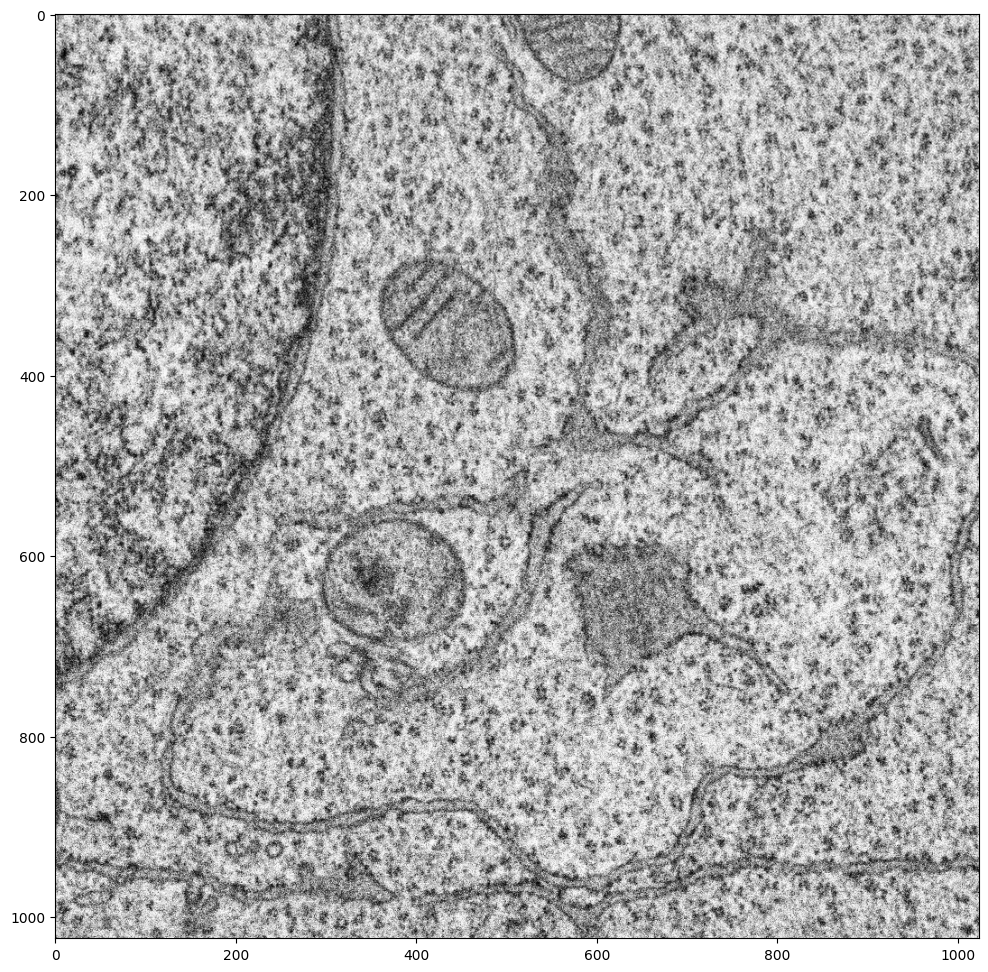

In [30]:
from matplotlib.pyplot import figure
figure(figsize=(12, 12))
display(Math("\mathtt{Original~slice}:"))
imgplot = plt.imshow(vol[vol.shape[0]//2], cmap="gray")

<IPython.core.display.Math object>

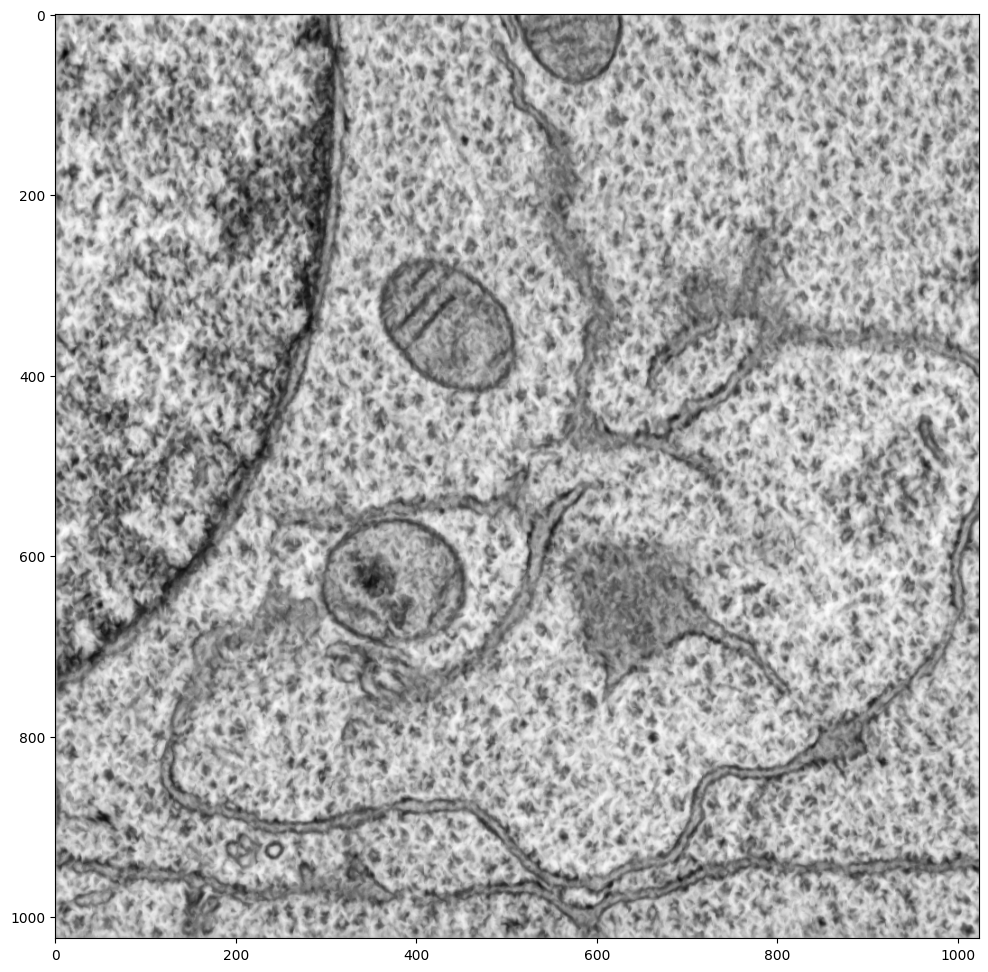

In [31]:
display(Math("\mathtt{Denoised~slice~using~OF}~(\sigma=2):"))
figure(figsize=(12, 12))
imgplot = plt.imshow(denoised_vol[vol.shape[0]//2], cmap="gray")

<IPython.core.display.Math object>

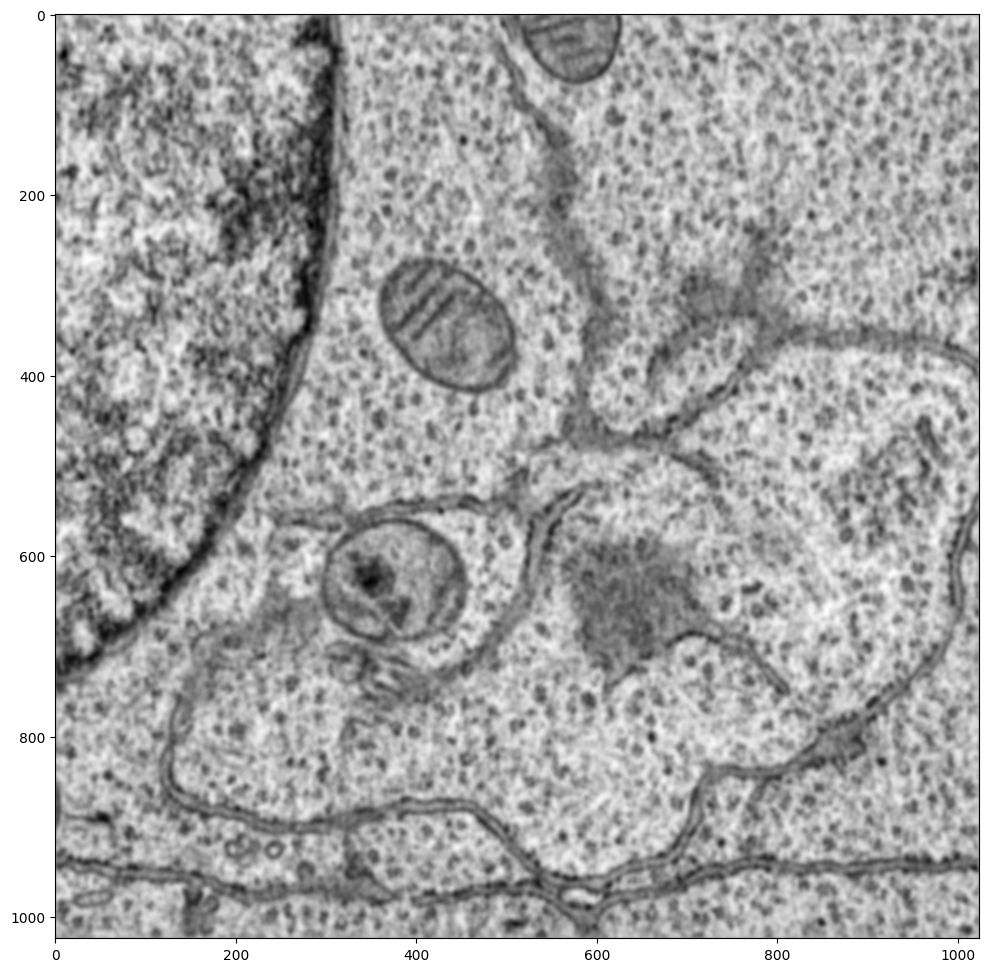

In [32]:
display(Math("\mathtt{Denoised~slice~using~standard~Gaussian~filtering}~(\sigma=2):"))
figure(figsize=(12, 12))
imgplot = plt.imshow(no_OF_denoised_vol[vol.shape[0]//2], cmap="gray")